In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
drebin_data = pd.read_csv('drebin.csv')


/tmp/ipykernel_68716/899786895.py:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.
  drebin_data = pd.read_csv('drebin.csv')


<h1 style="text-align: center;color:green">Exploratory Data Analysis (EDA)</h1>


<h3>1. Descriptive Statistics:</h3>

**Summary Statistics:**

In [106]:
# Summary statistics for numerical columns
numerical_summary = drebin_data.describe()
print(numerical_summary)


           transact  onServiceConnected   bindService  attachInterface  \
count  15036.000000        15036.000000  15036.000000     15036.000000   
mean       0.426443            0.446595      0.442671         0.413208   
std        0.494576            0.497156      0.496719         0.492426   
min        0.000000            0.000000      0.000000         0.000000   
25%        0.000000            0.000000      0.000000         0.000000   
50%        0.000000            0.000000      0.000000         0.000000   
75%        1.000000            1.000000      1.000000         1.000000   
max        1.000000            1.000000      1.000000         1.000000   

       ServiceConnection  android.os.Binder      SEND_SMS  \
count       15036.000000       15036.000000  15036.000000   
mean            0.444932           0.486898      0.236632   
std             0.496975           0.499845      0.425029   
min             0.000000           0.000000      0.000000   
25%             0.000000    

**Unique Values in Categorical Columns:**

In [107]:
# Unique values in categorical columns
categorical_columns = drebin_data.select_dtypes(include='object').columns.tolist()
for col in categorical_columns:
    unique_values = drebin_data[col].unique()
    print(f"Unique values in column '{col}': {unique_values}")


Unique values in column 'TelephonyManager.getSimCountryIso': ['0' '1' '?' 1 0]
Unique values in column 'class': ['S' 'B']


<h3>2. Data Visualization:</h3>

**Histograms for Numerical Columns:**


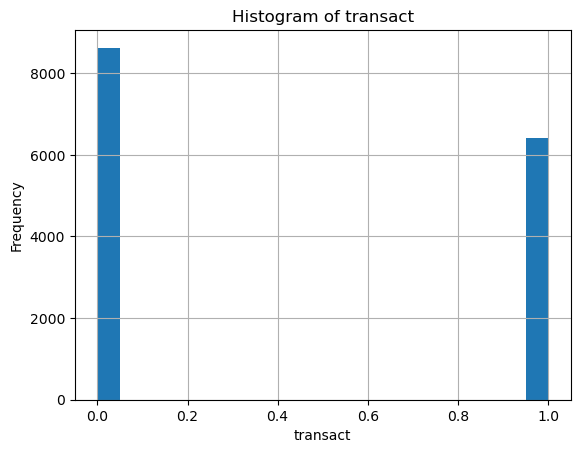

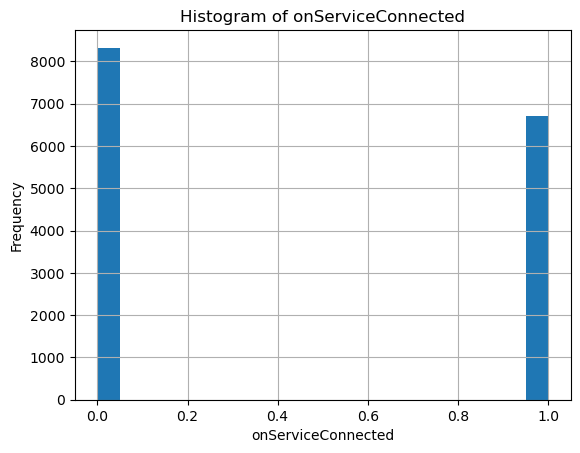

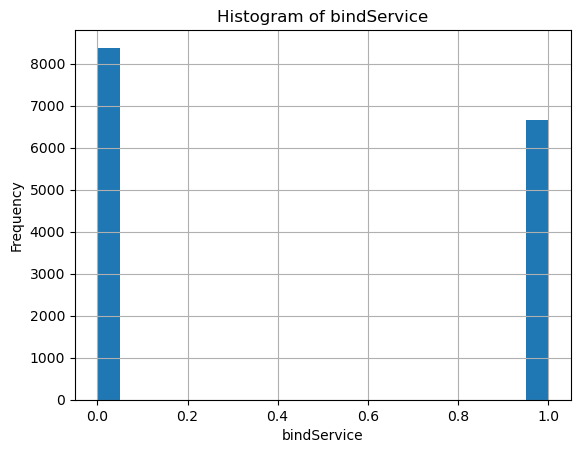

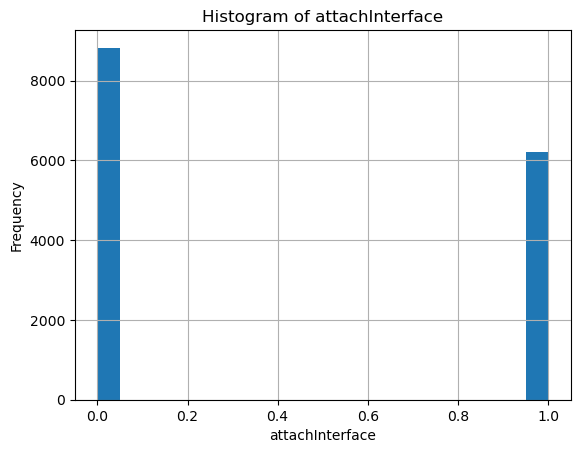

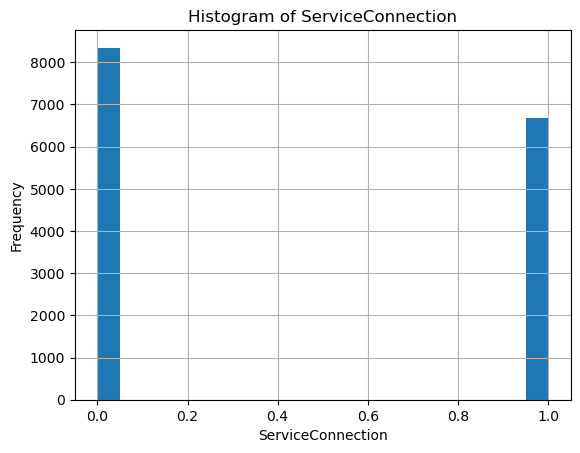

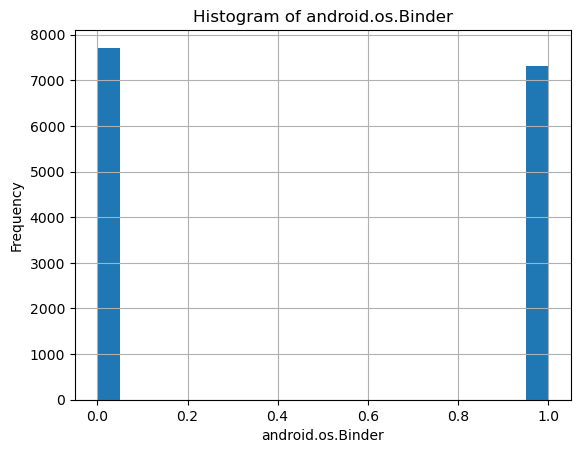

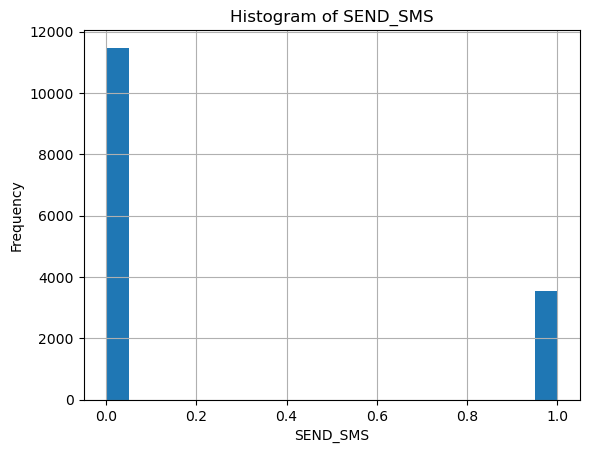

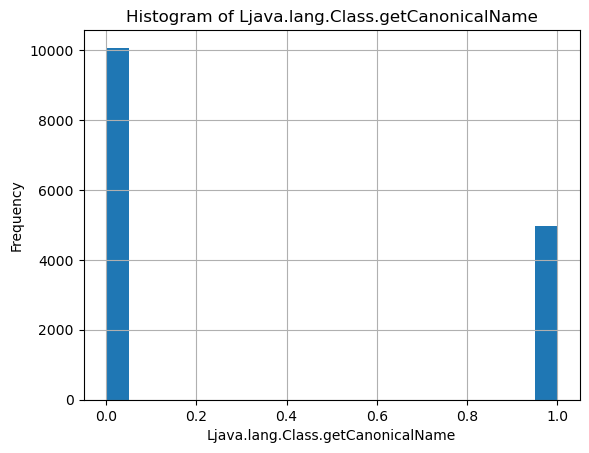

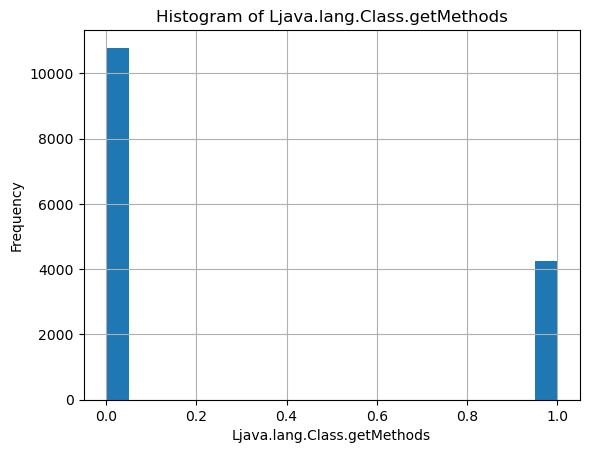

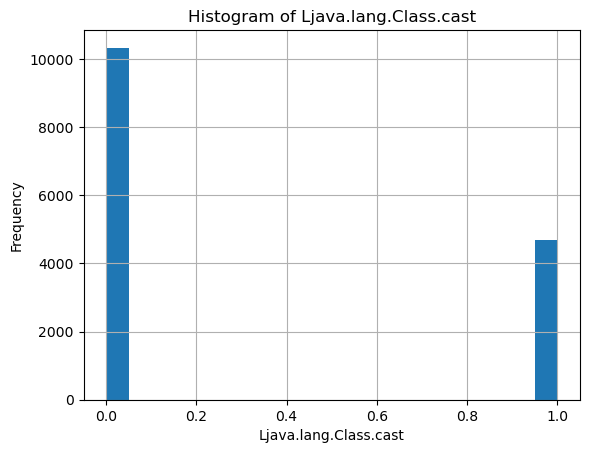

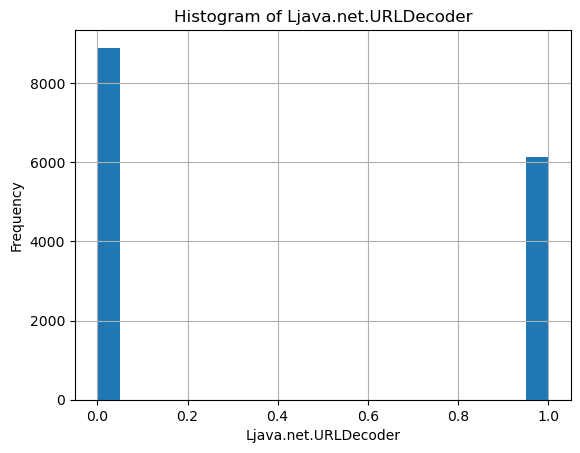

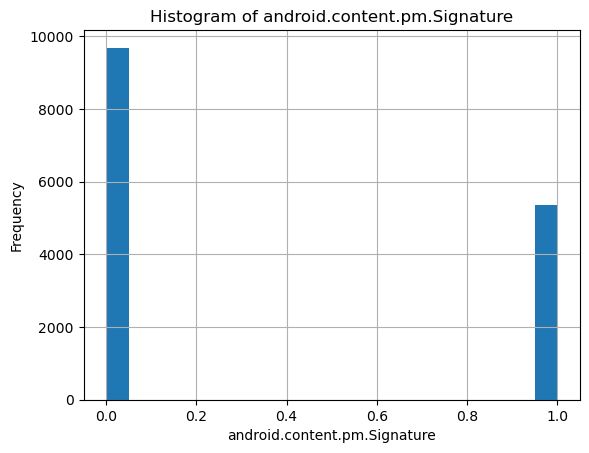

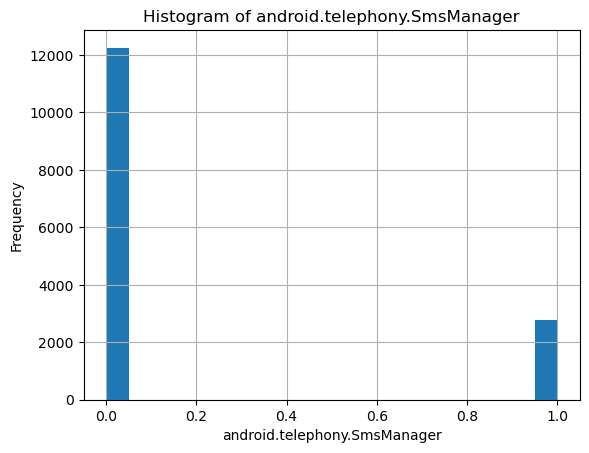

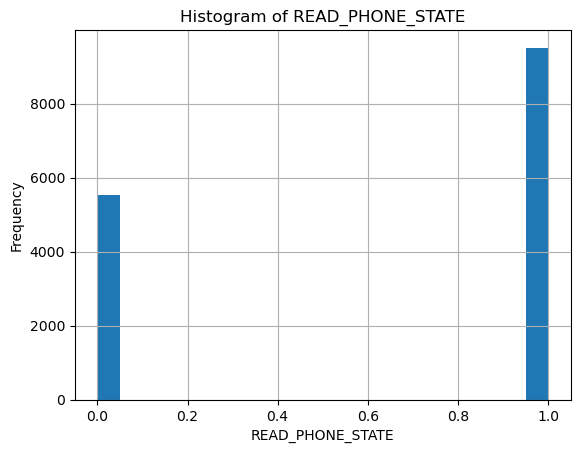

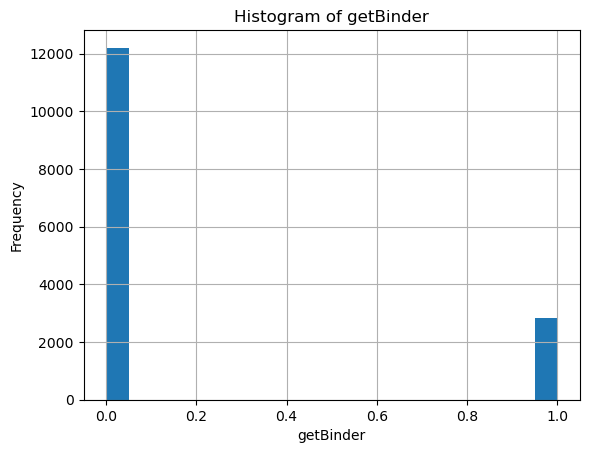

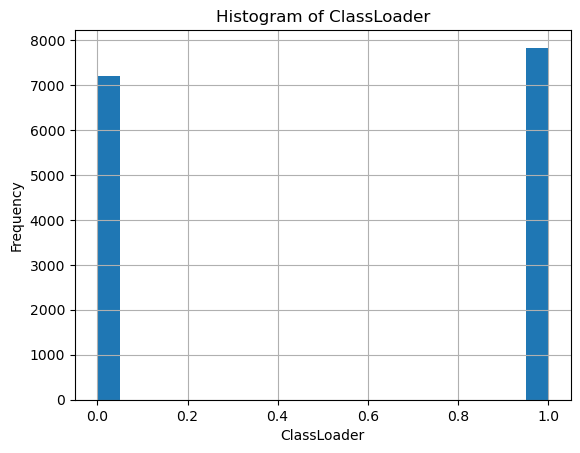

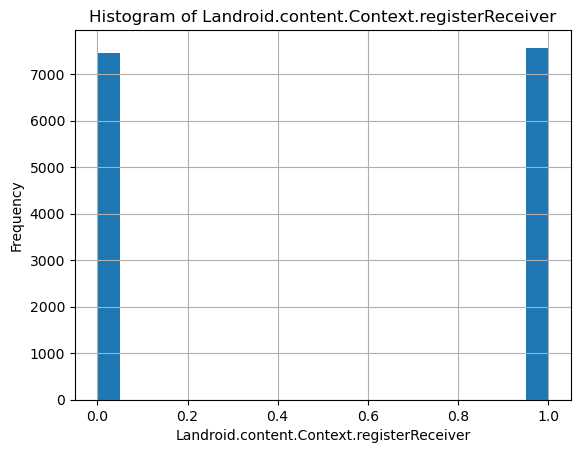

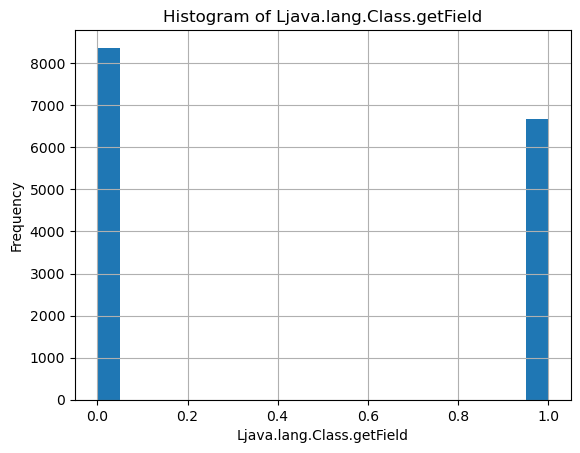

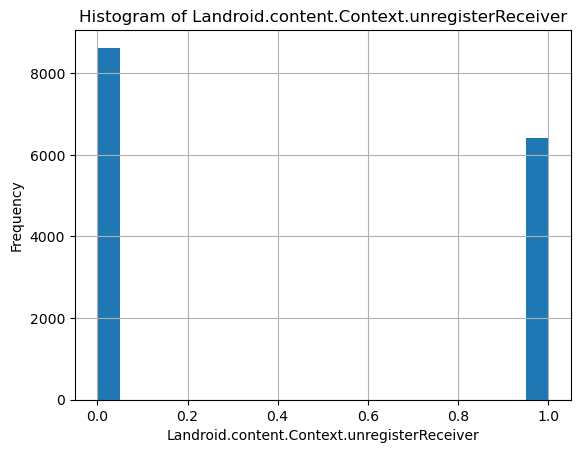

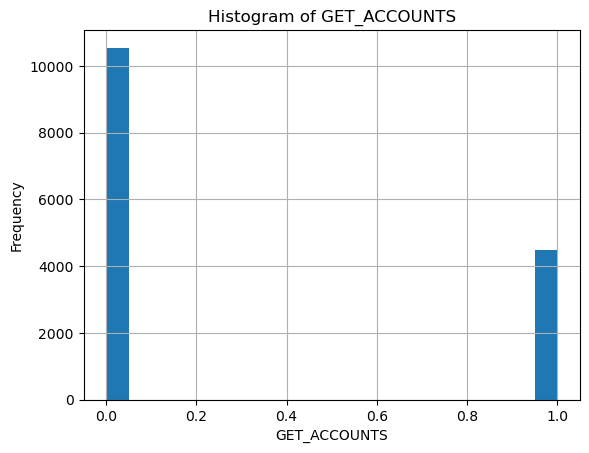

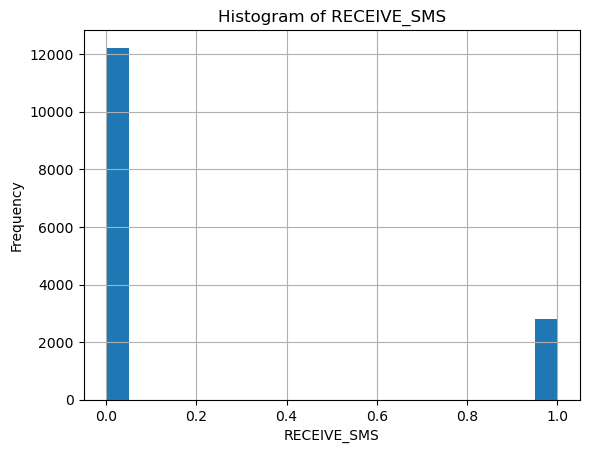

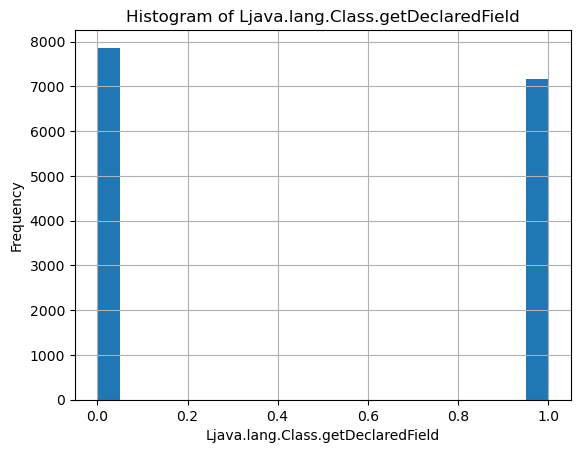

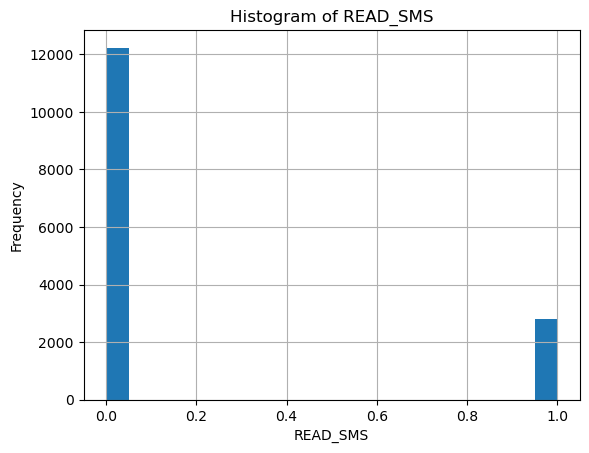

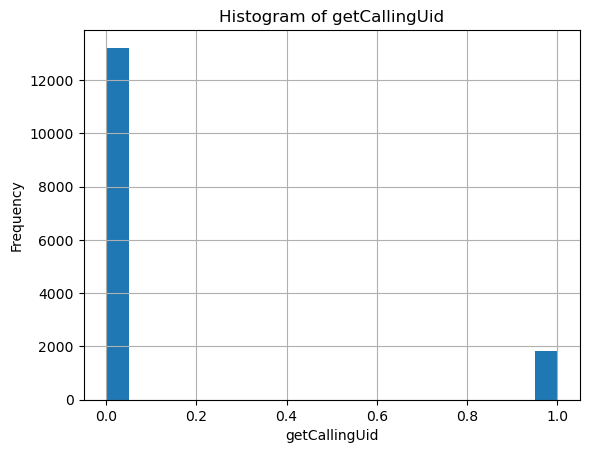

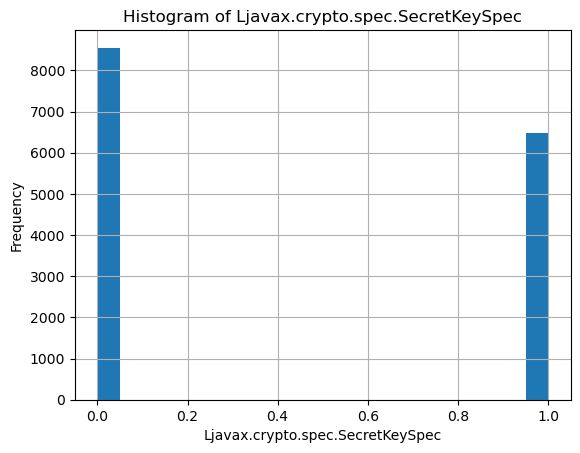

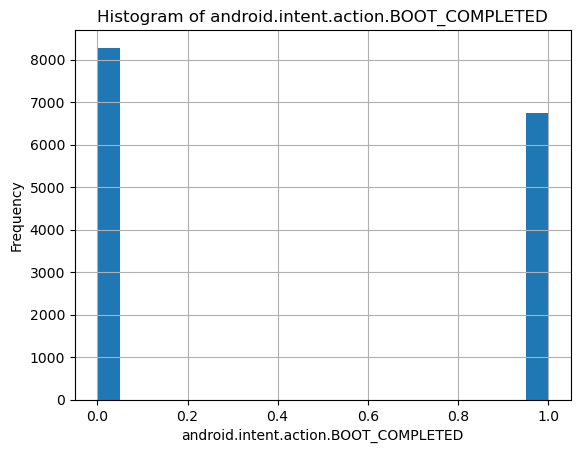

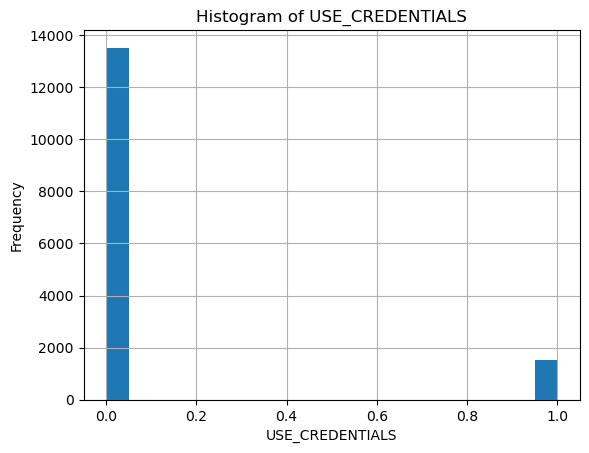

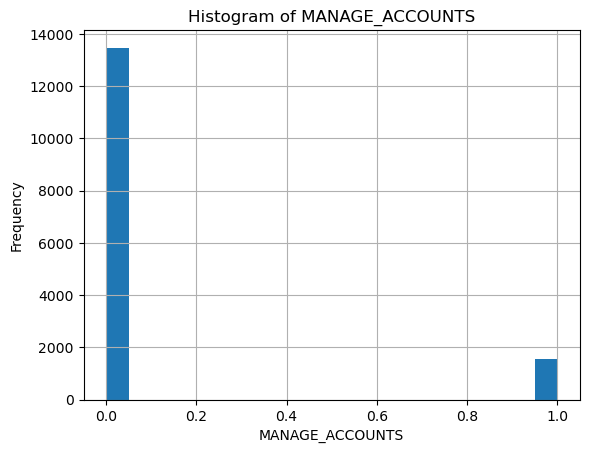

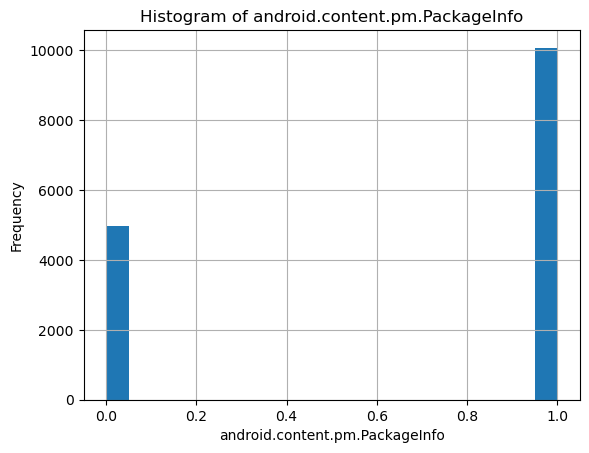

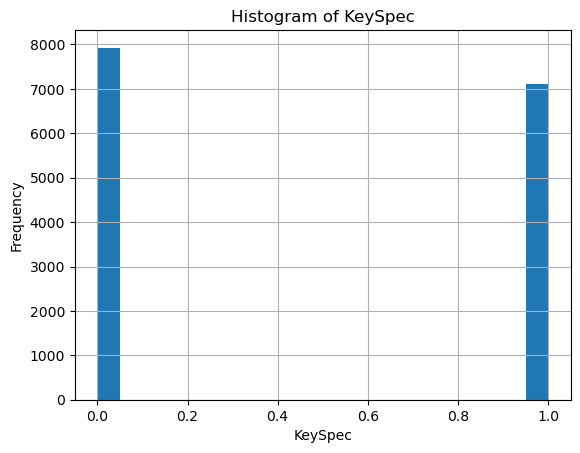

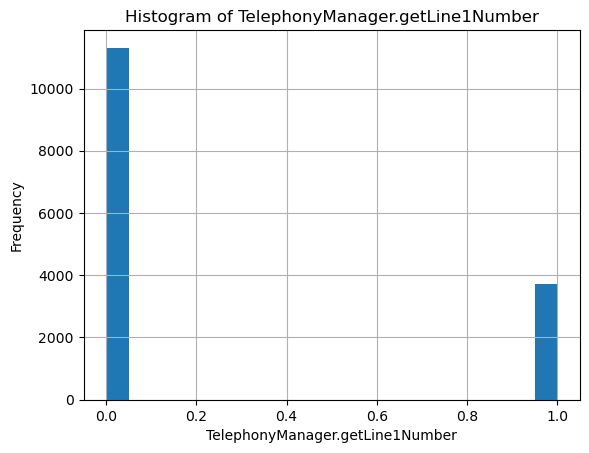

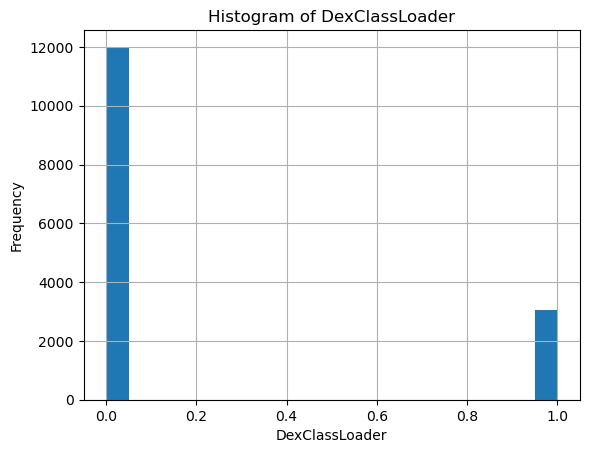

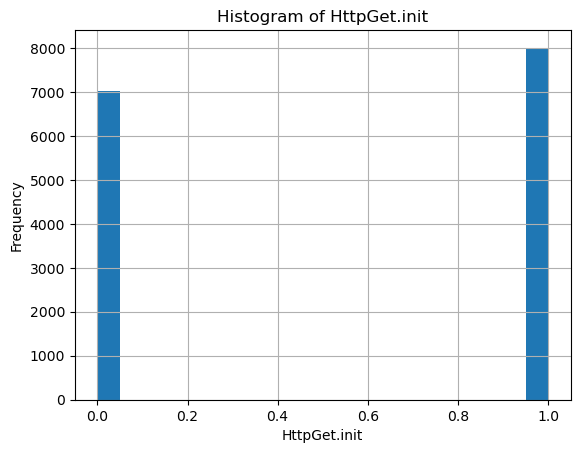

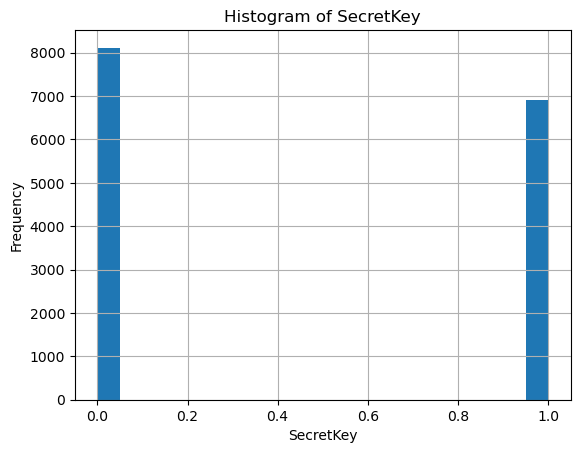

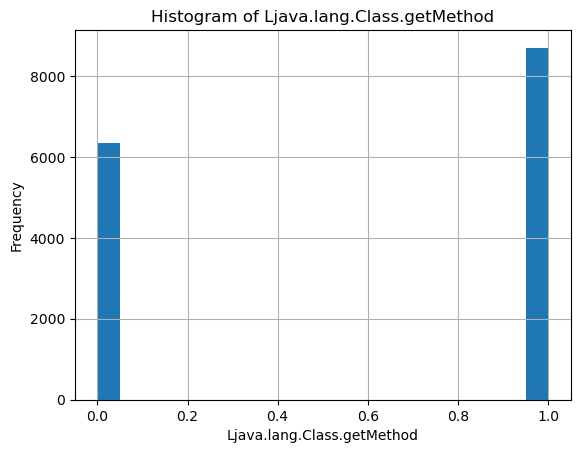

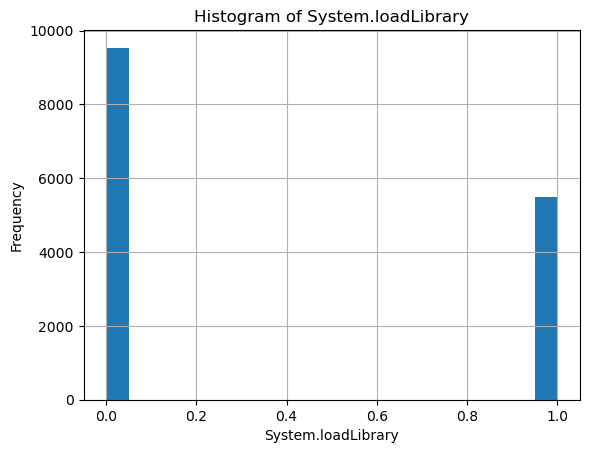

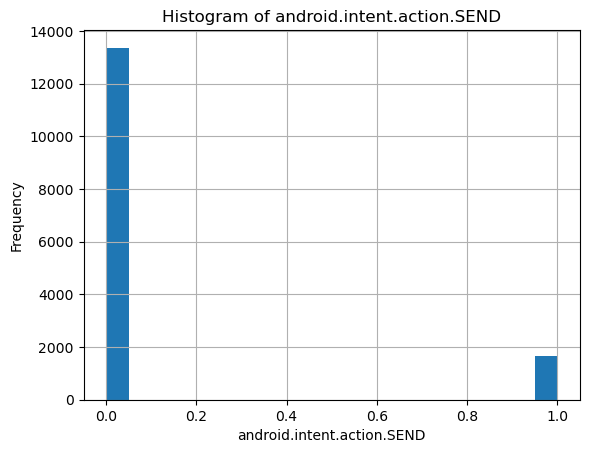

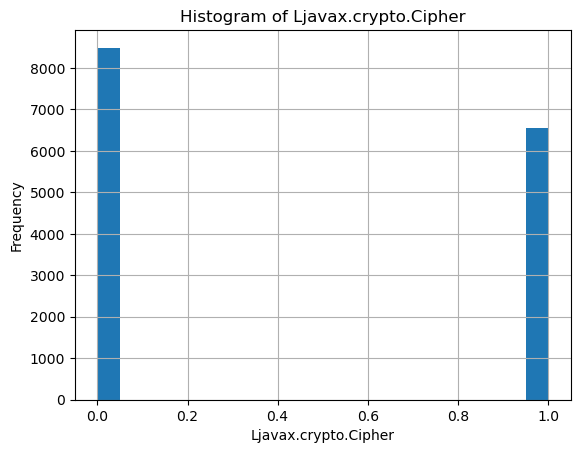

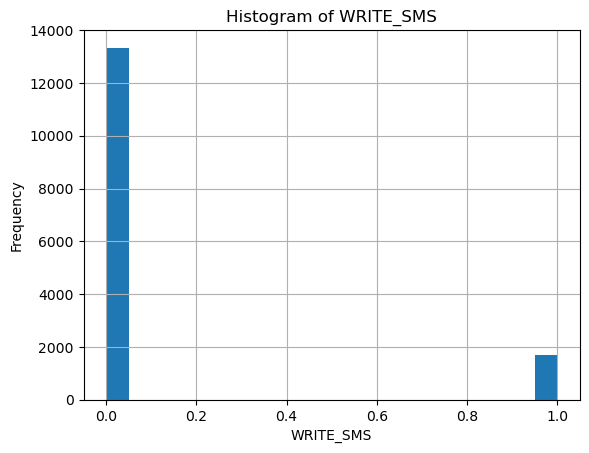

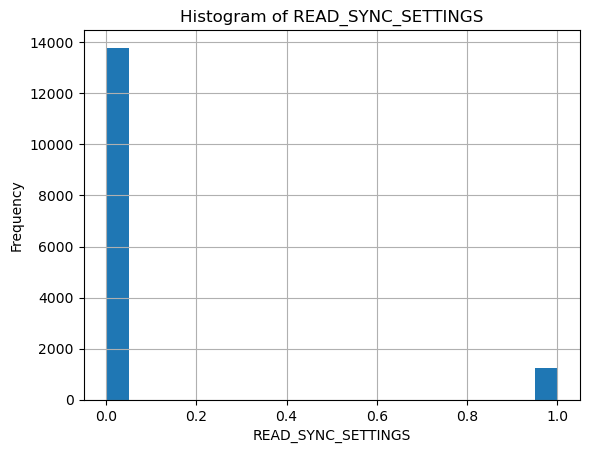

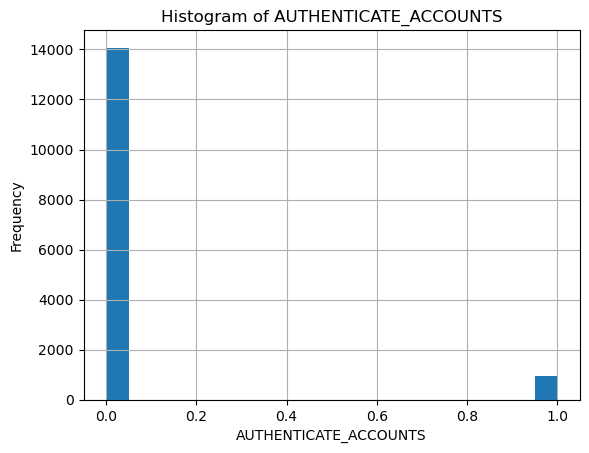

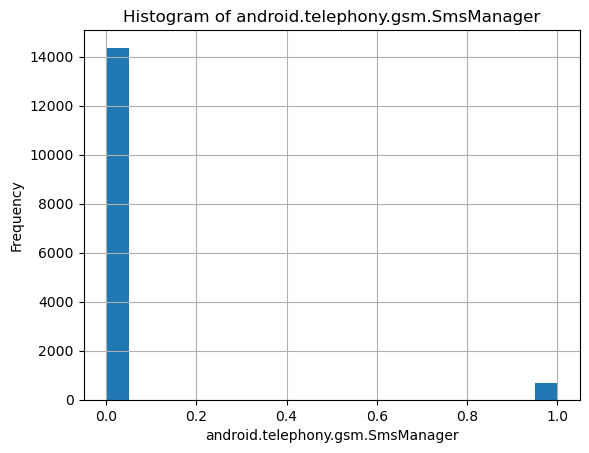

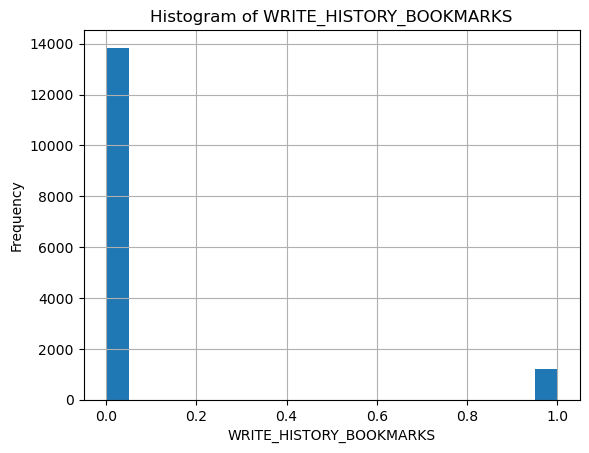

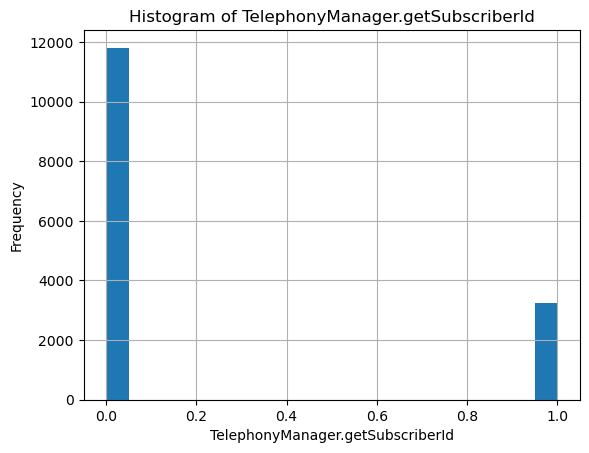

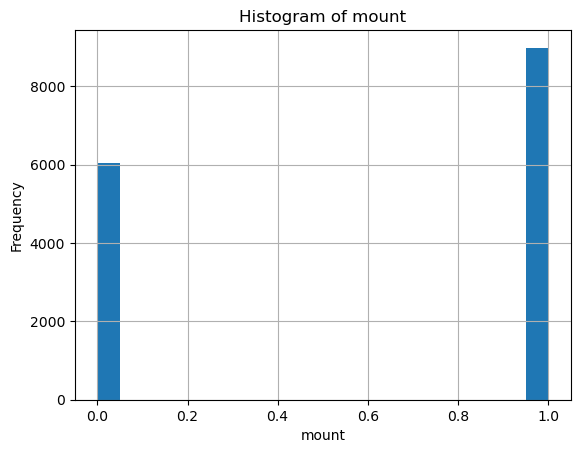

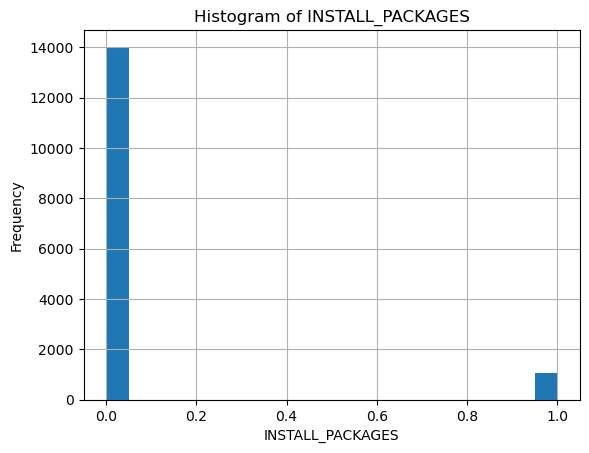

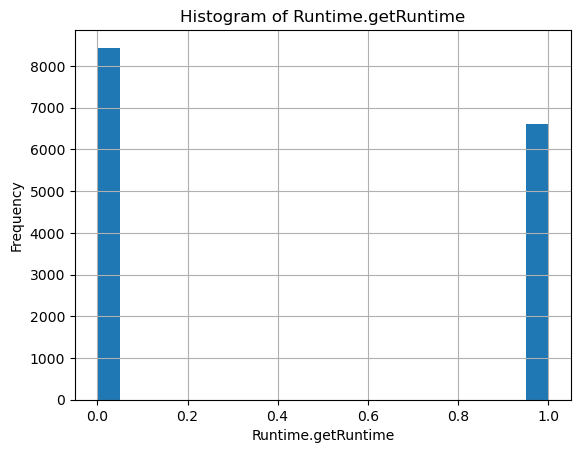

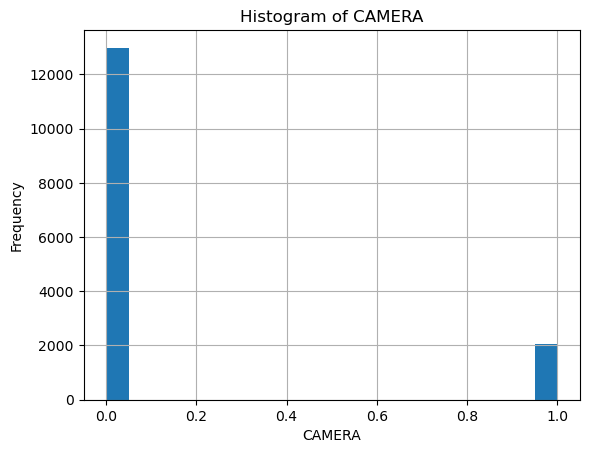

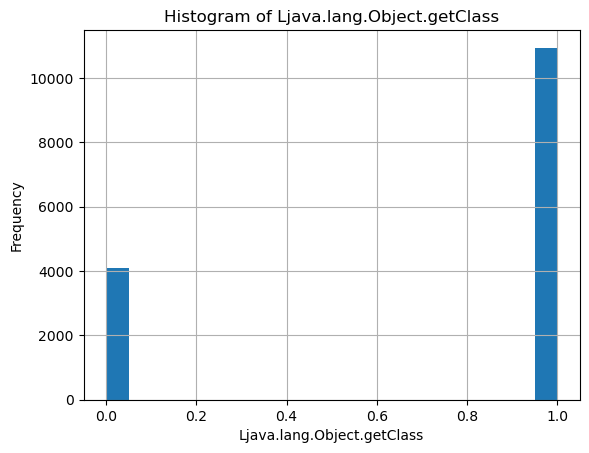

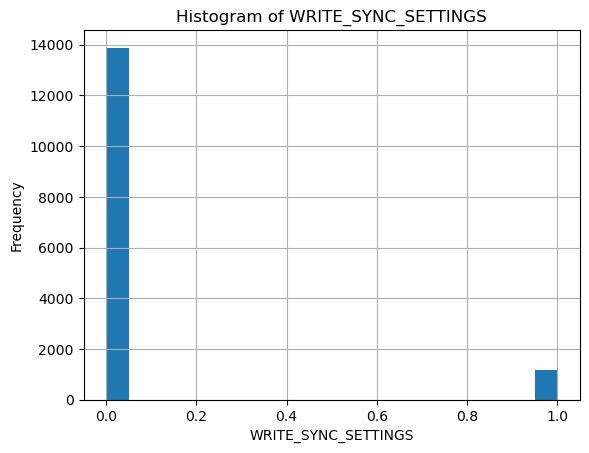

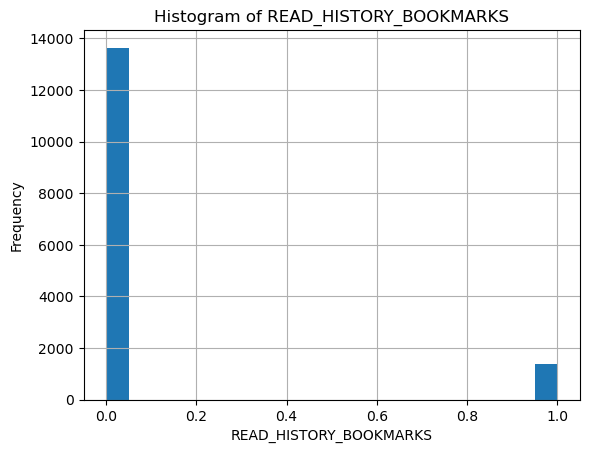

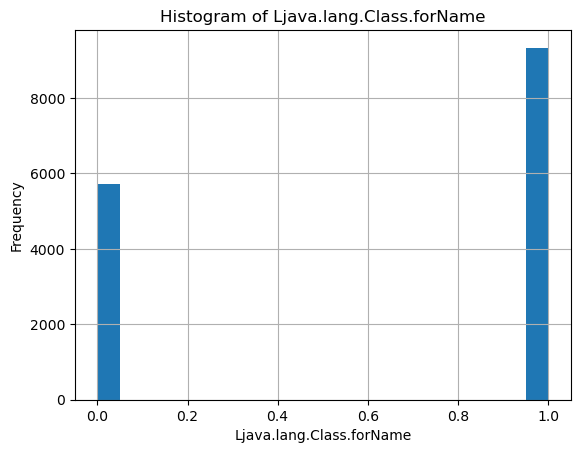

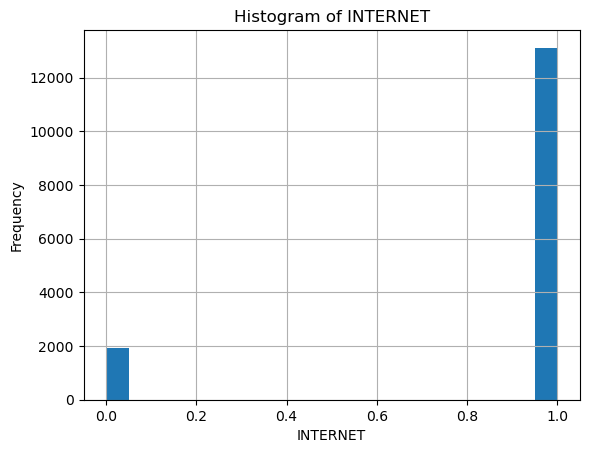

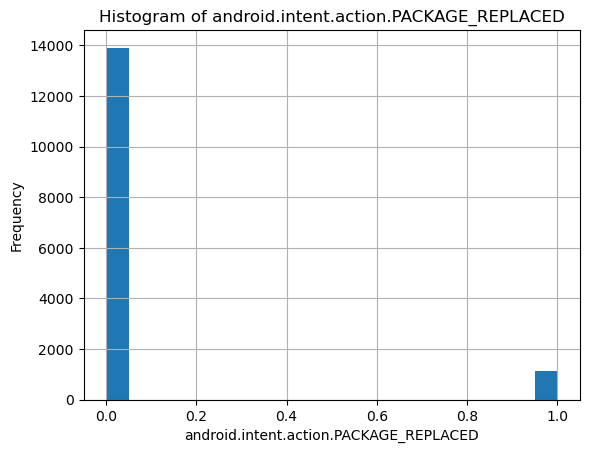

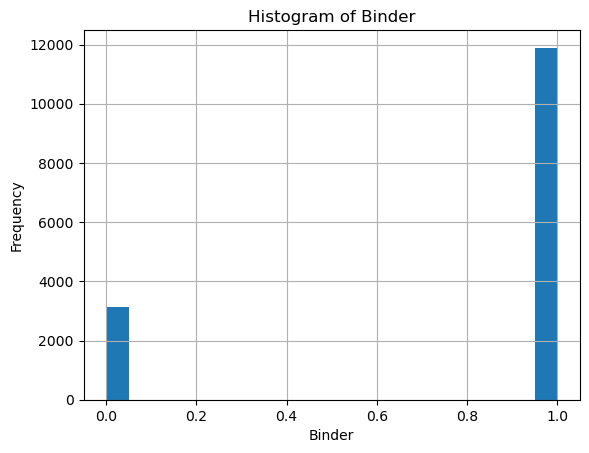

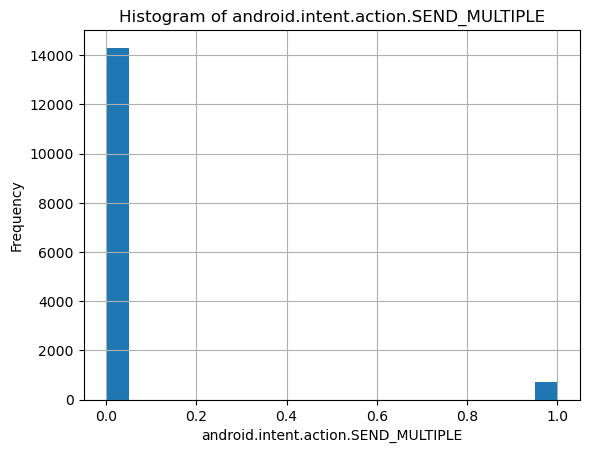

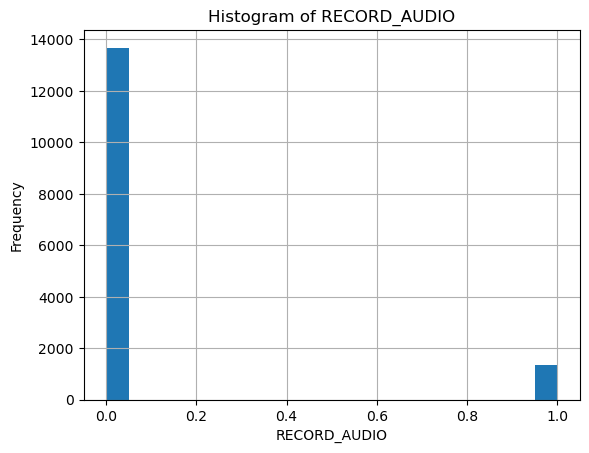

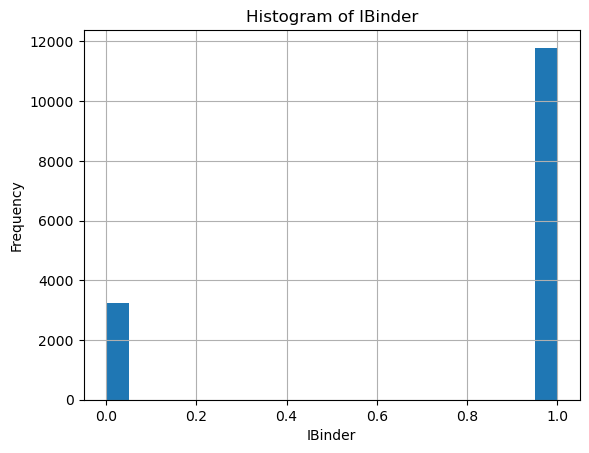

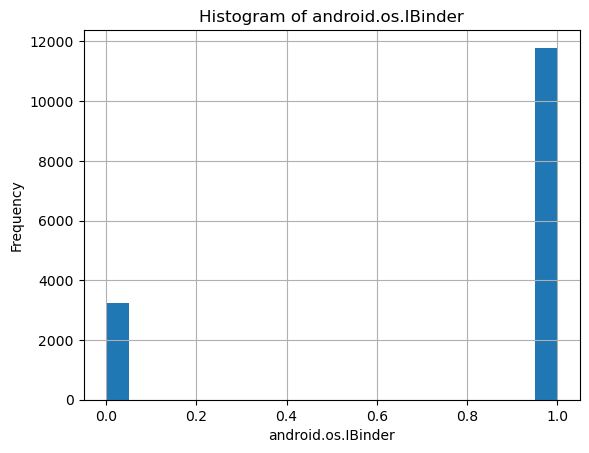

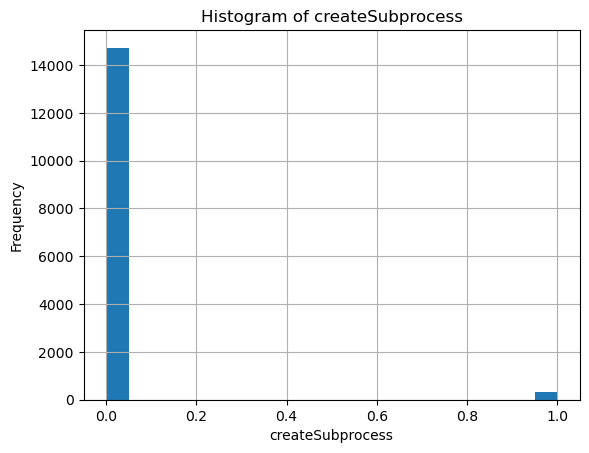

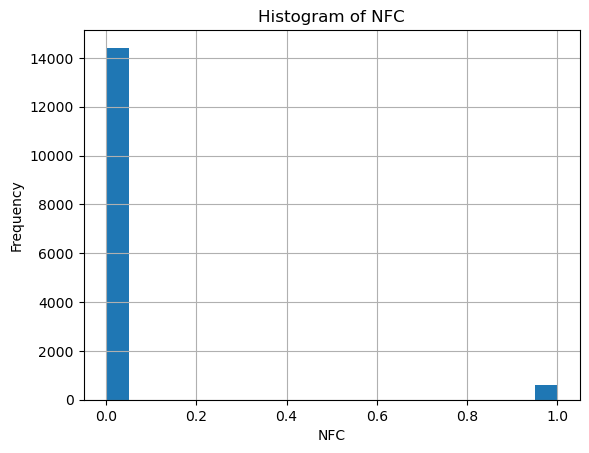

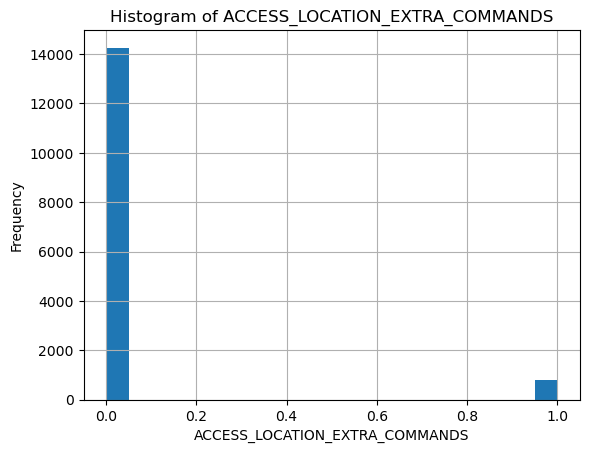

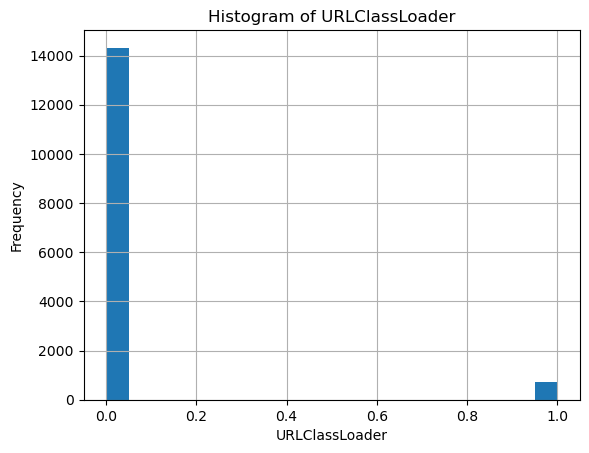

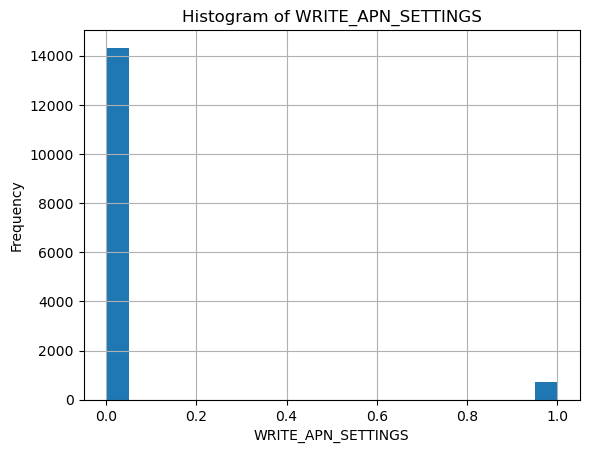

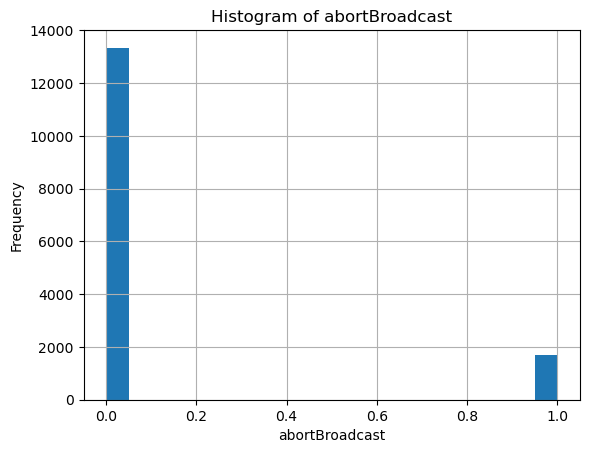

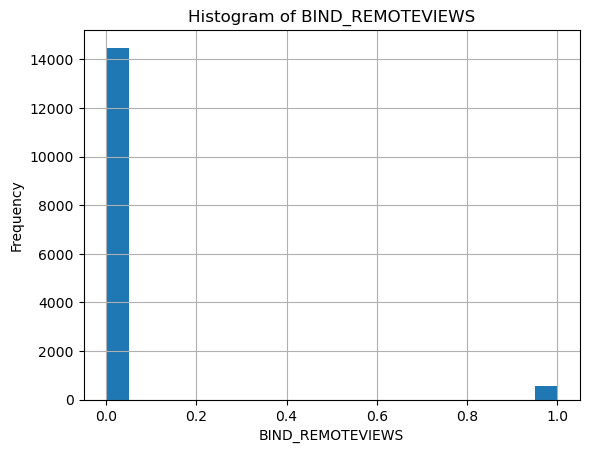

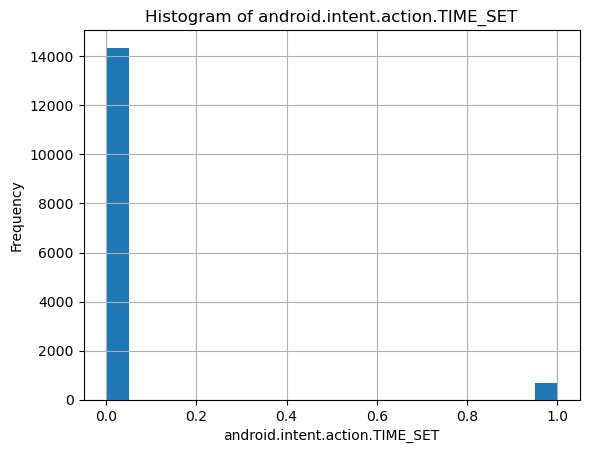

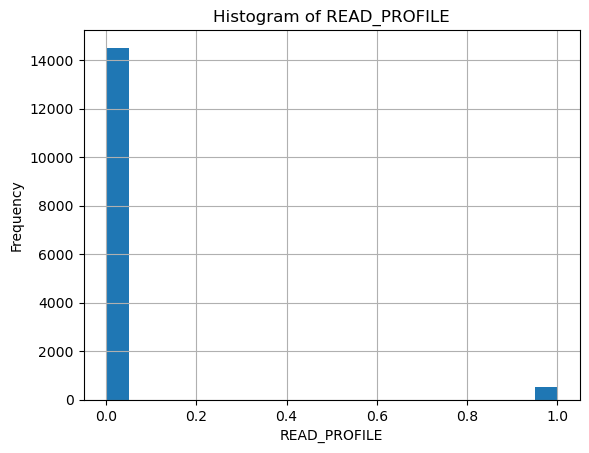

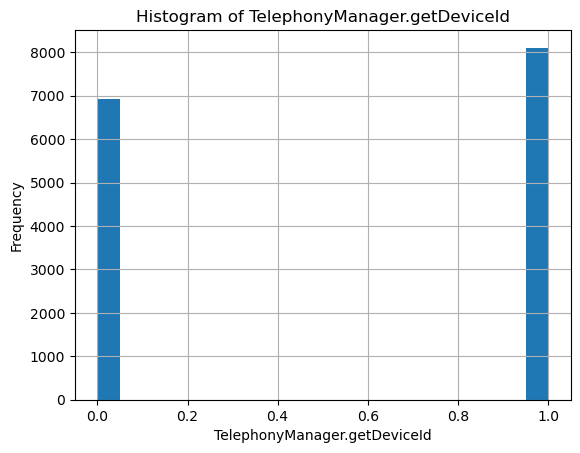

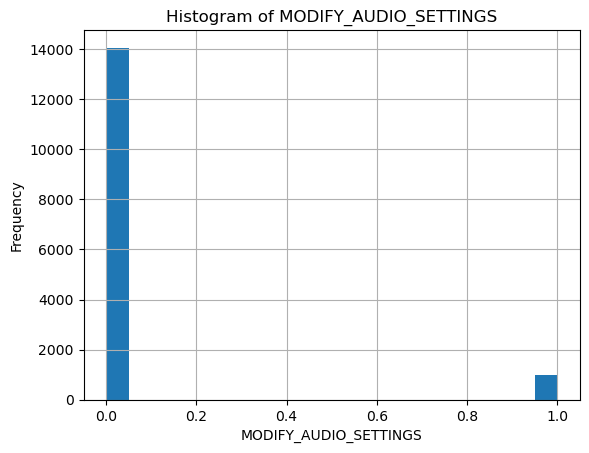

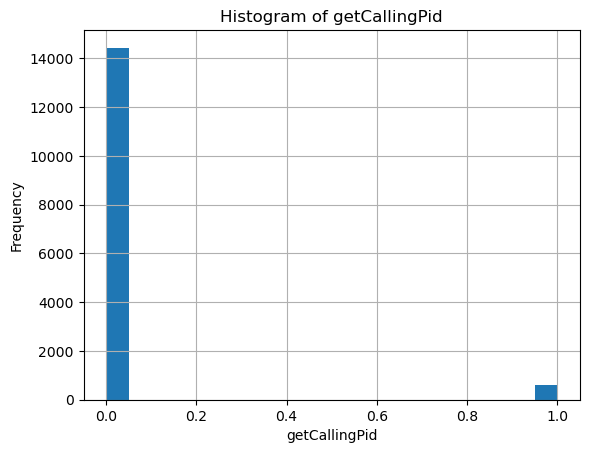

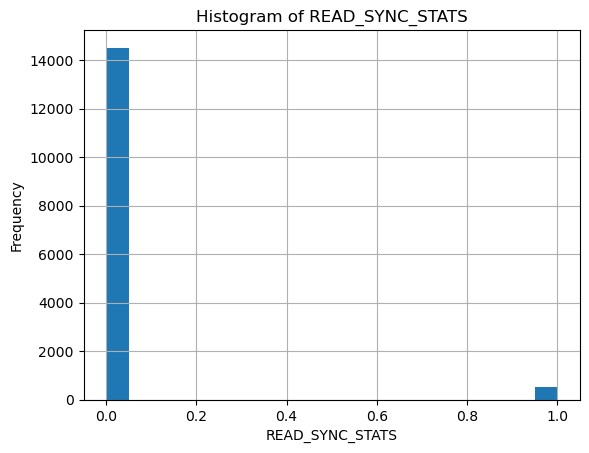

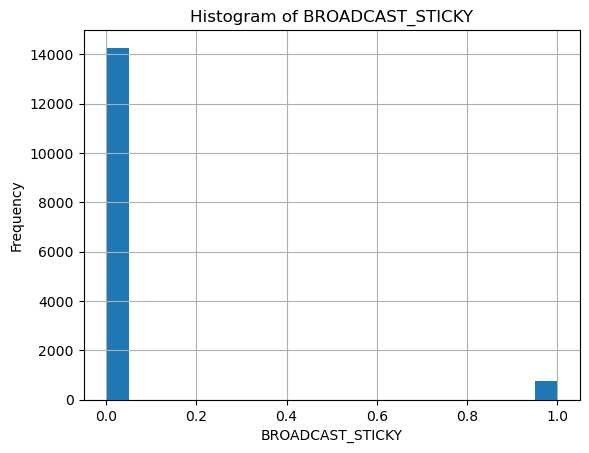

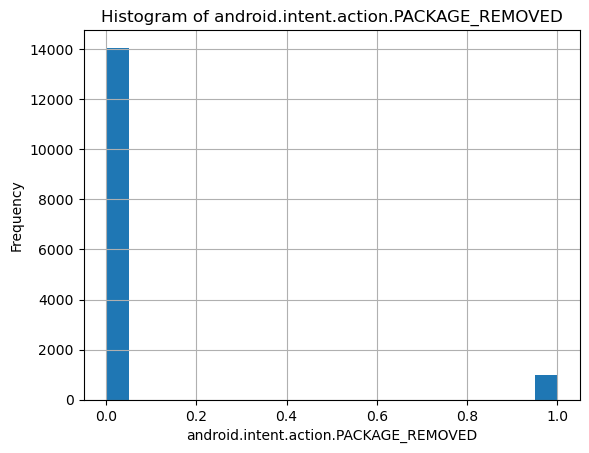

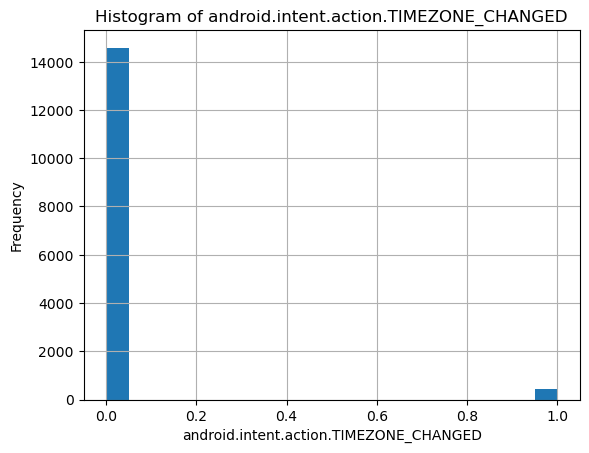

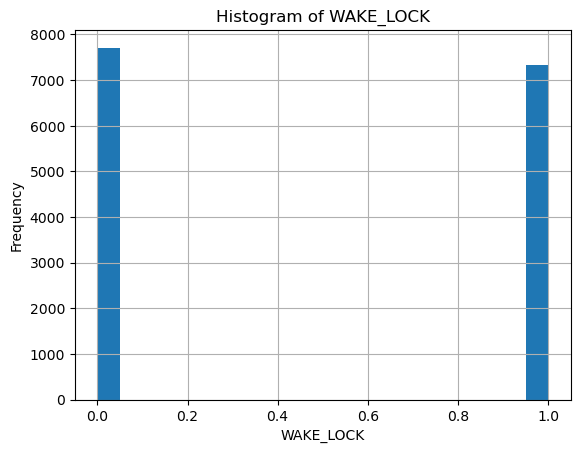

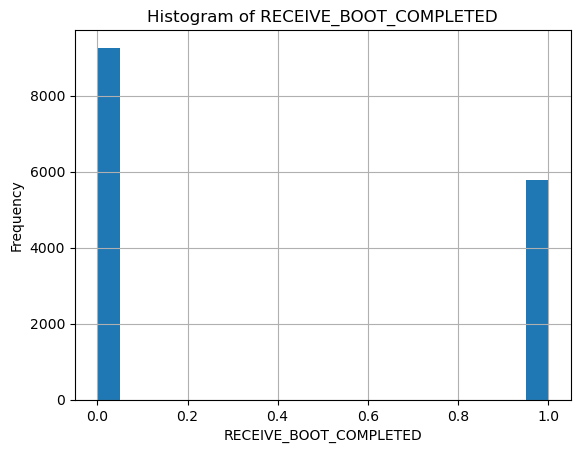

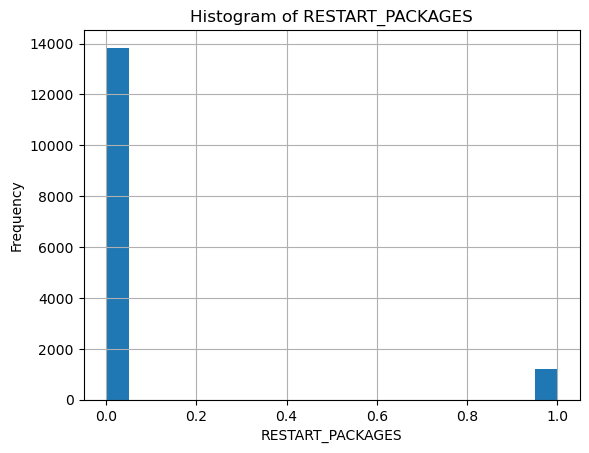

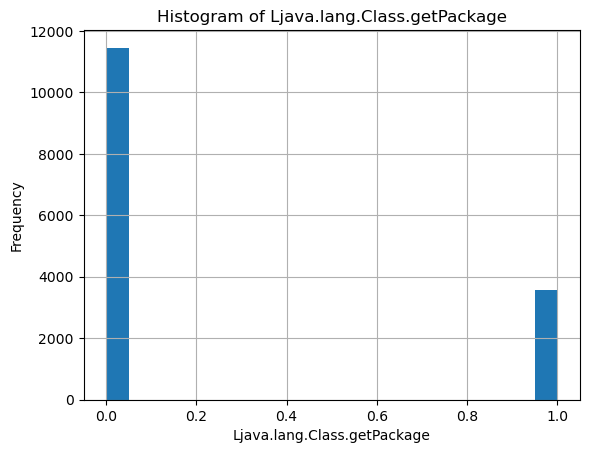

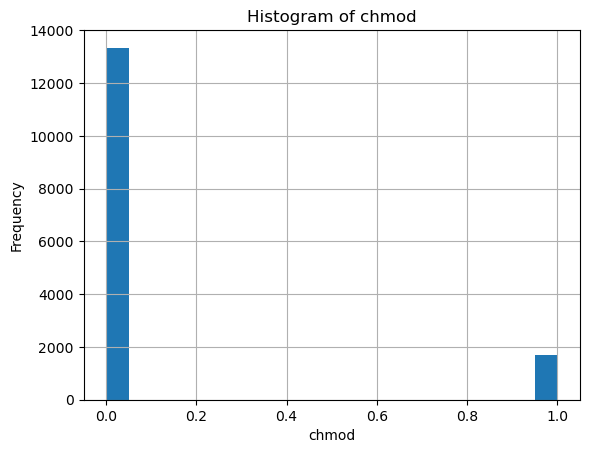

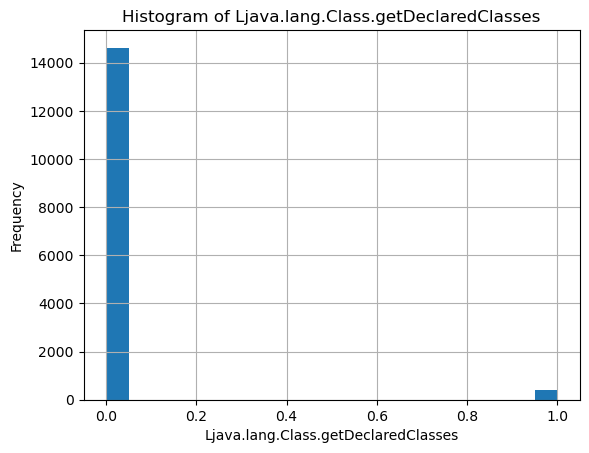

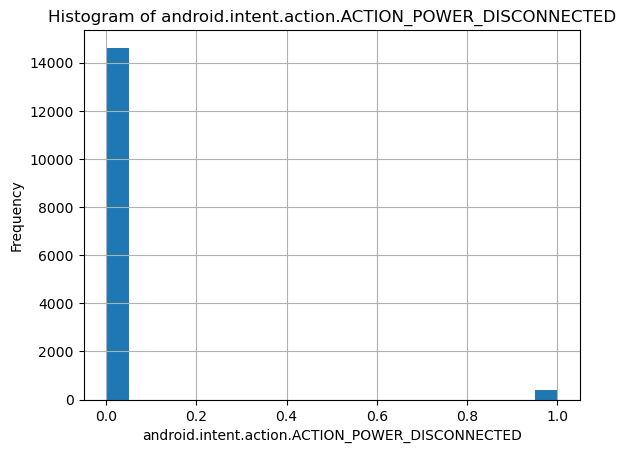

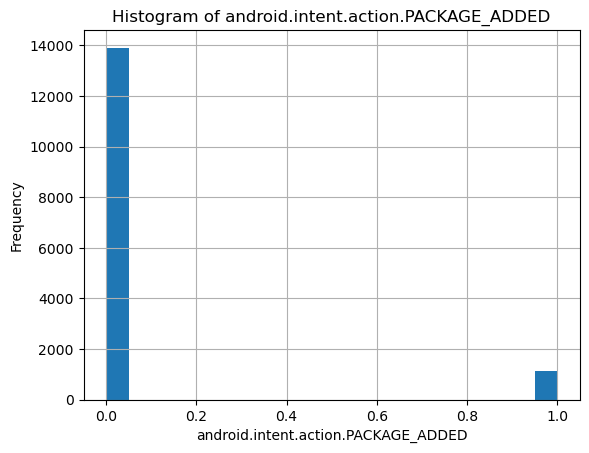

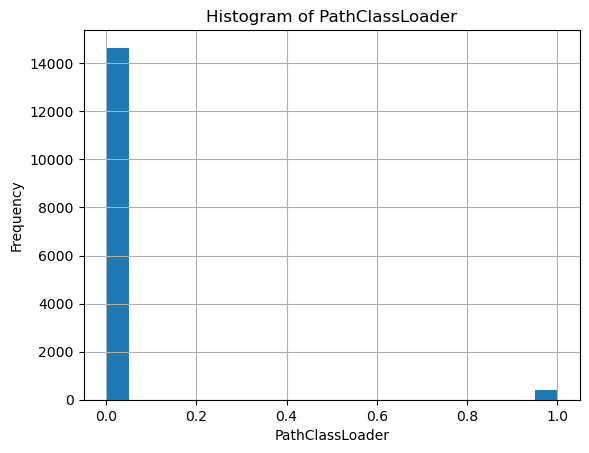

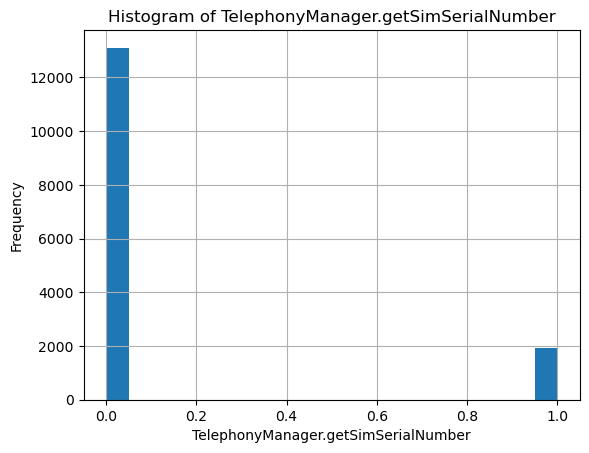

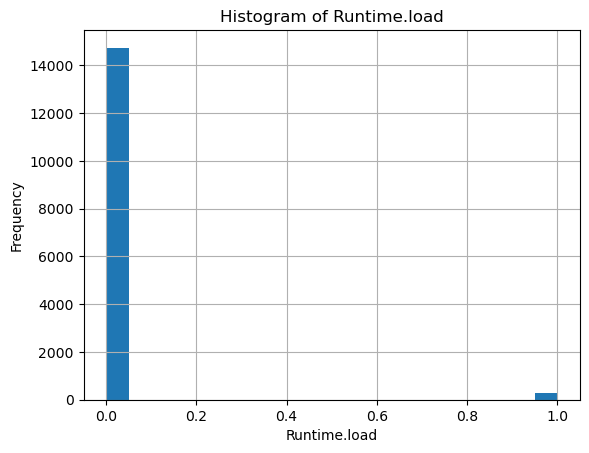

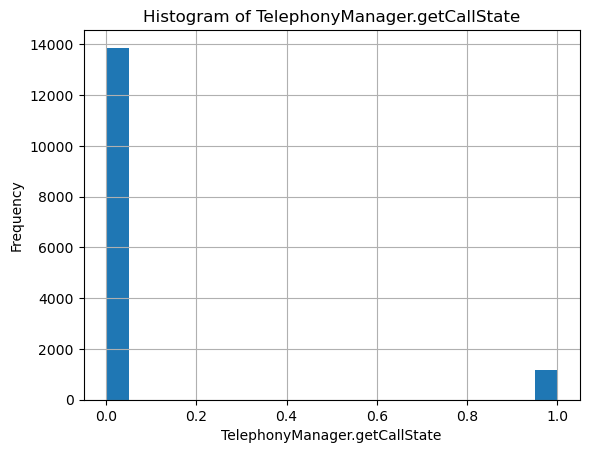

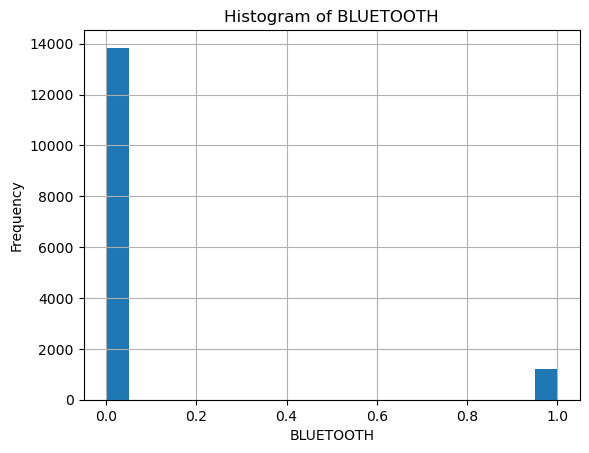

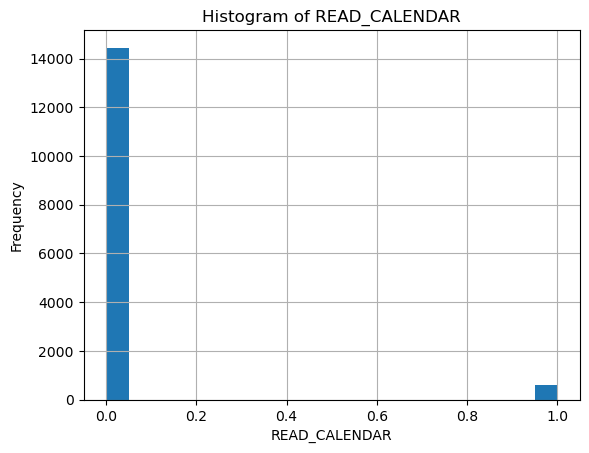

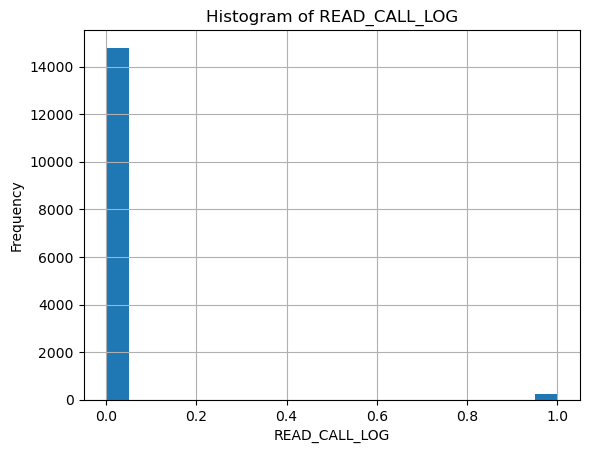

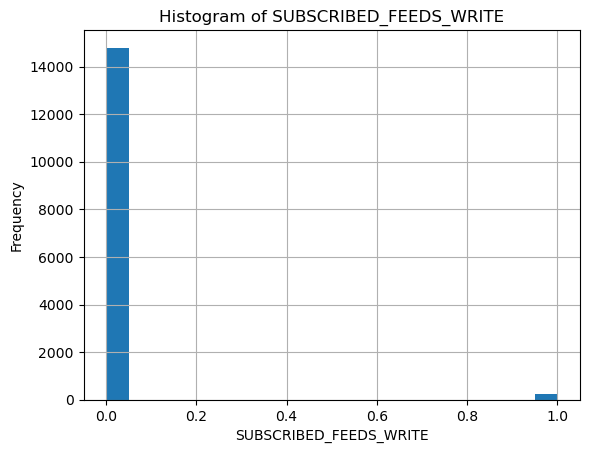

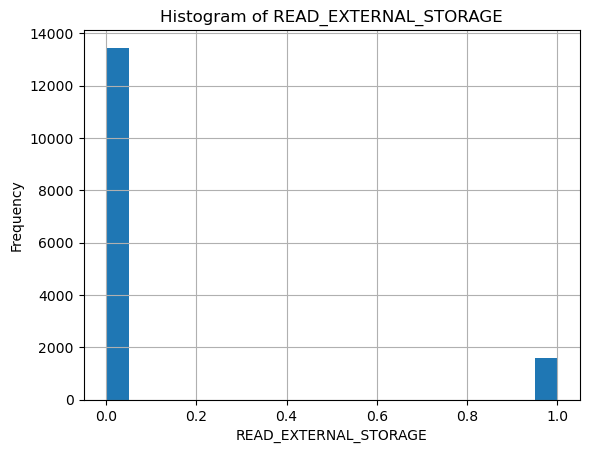

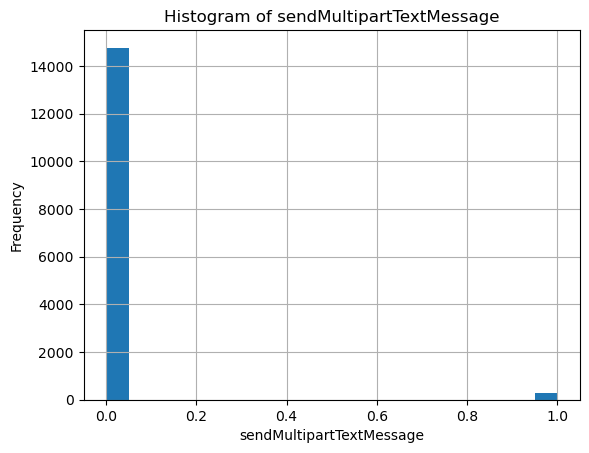

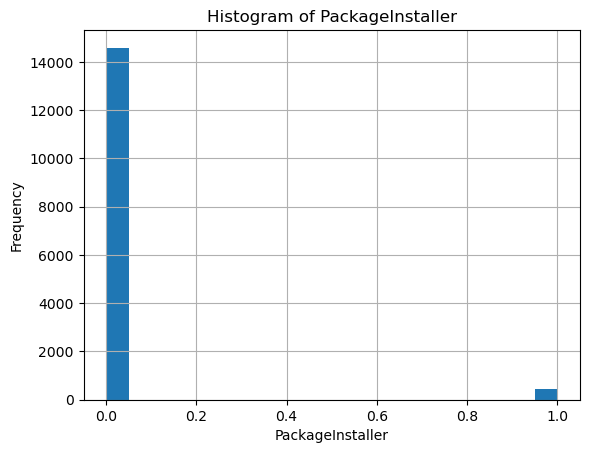

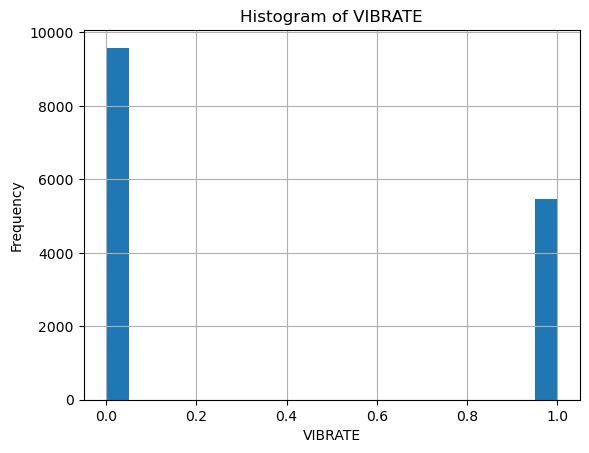

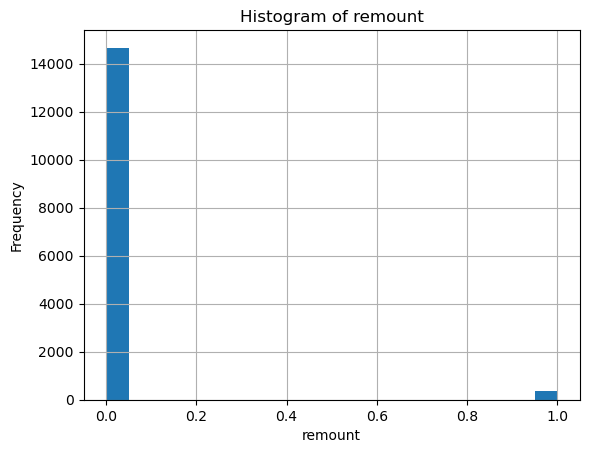

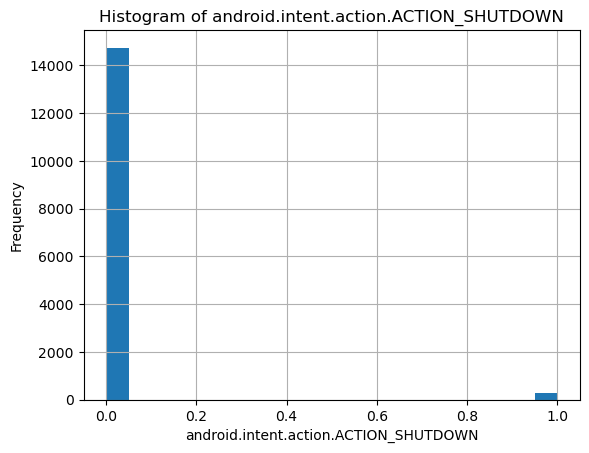

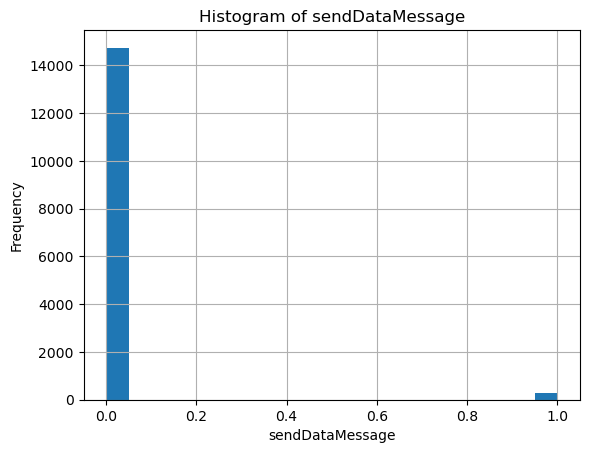

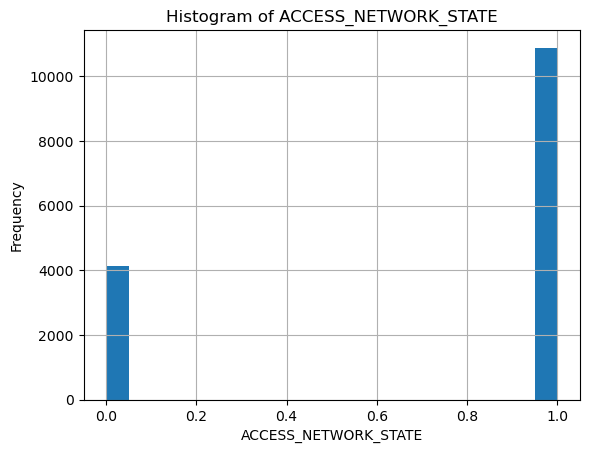

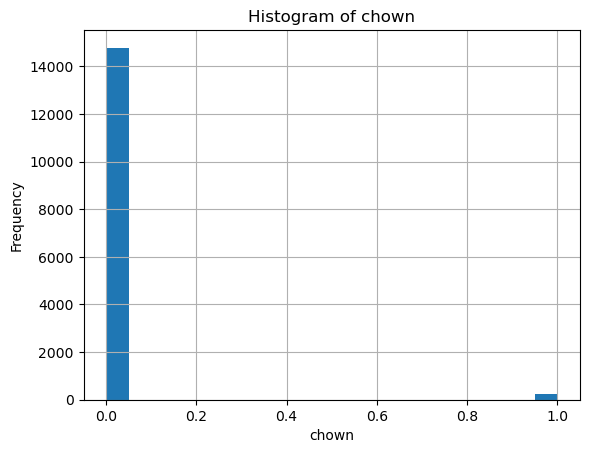

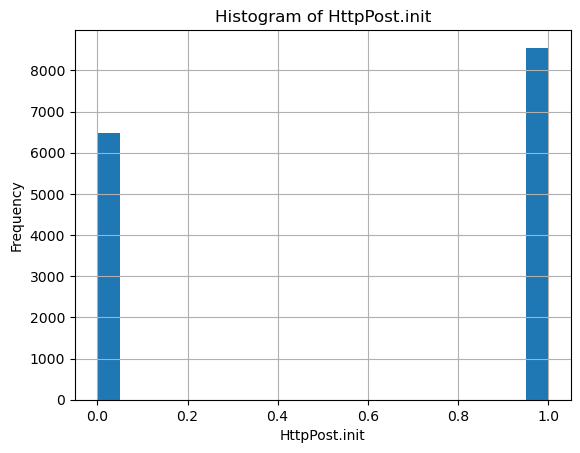

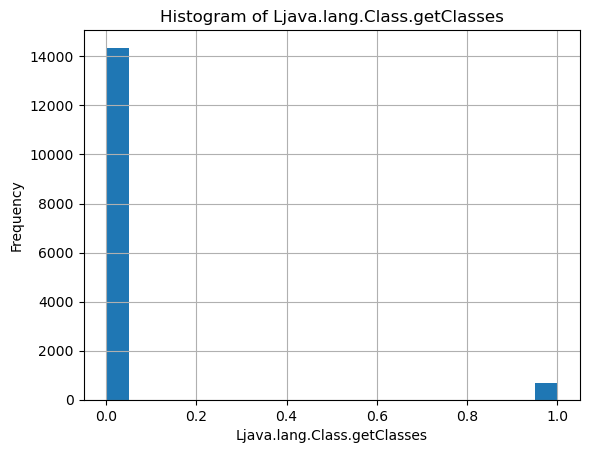

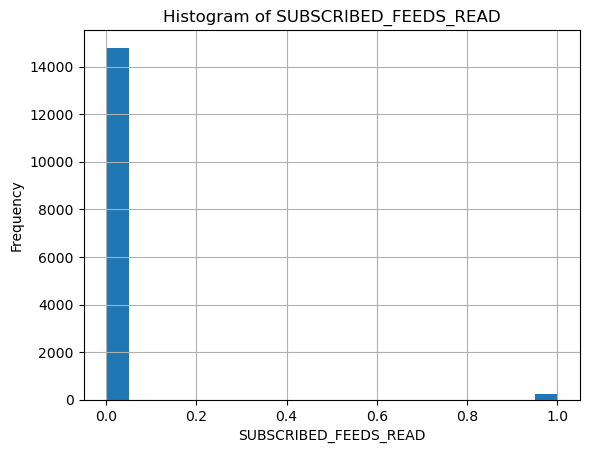

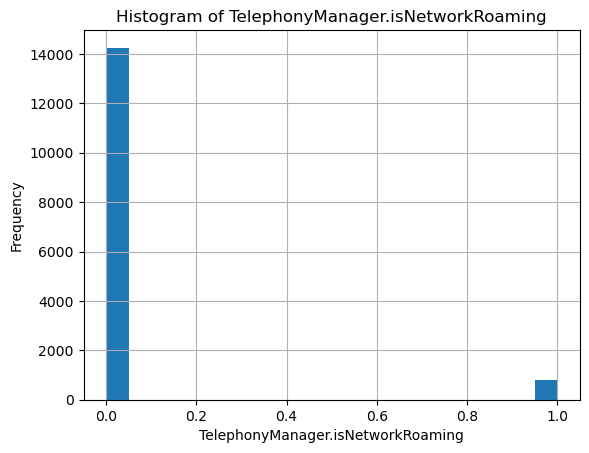

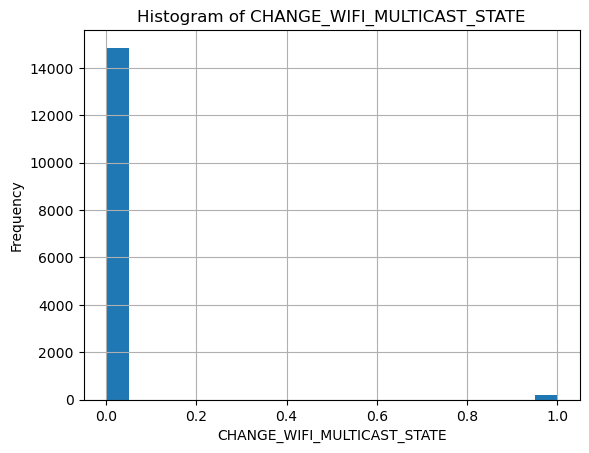

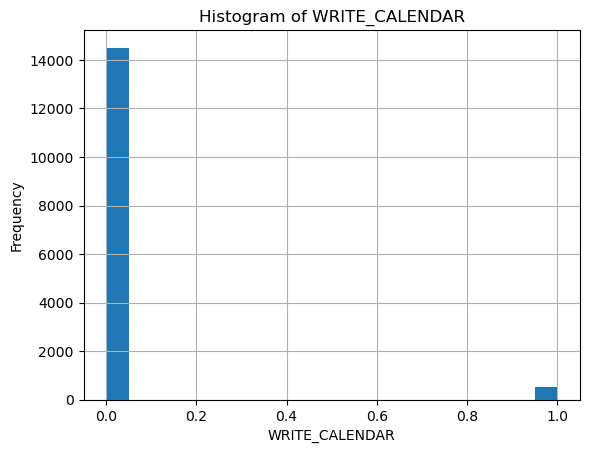

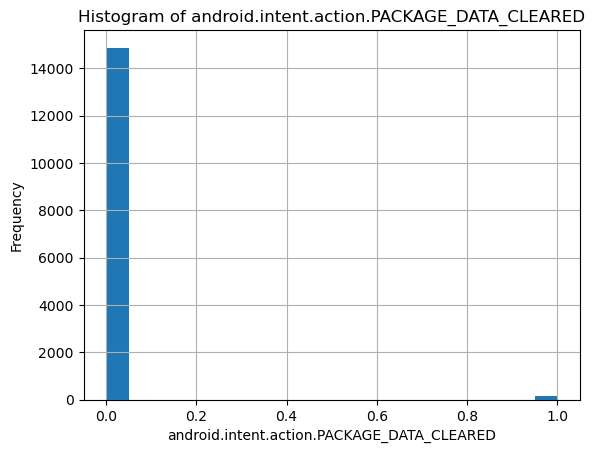

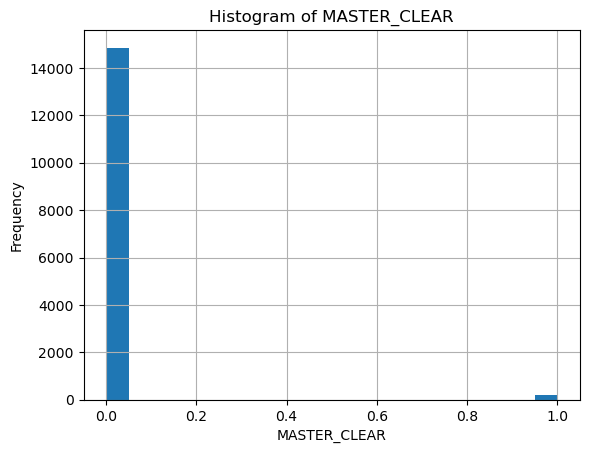

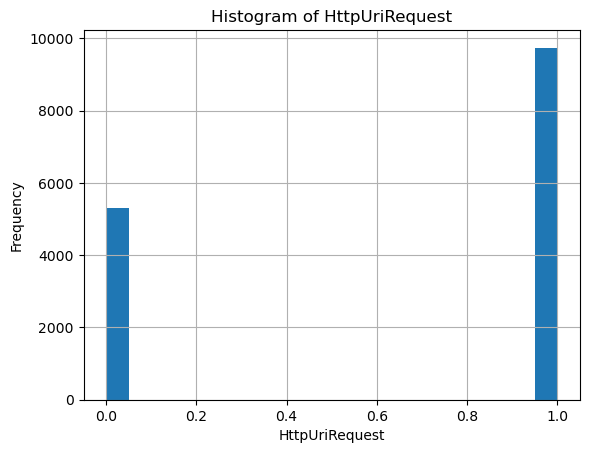

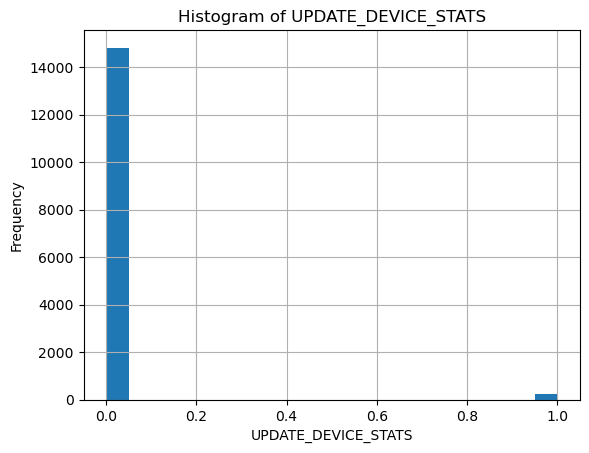

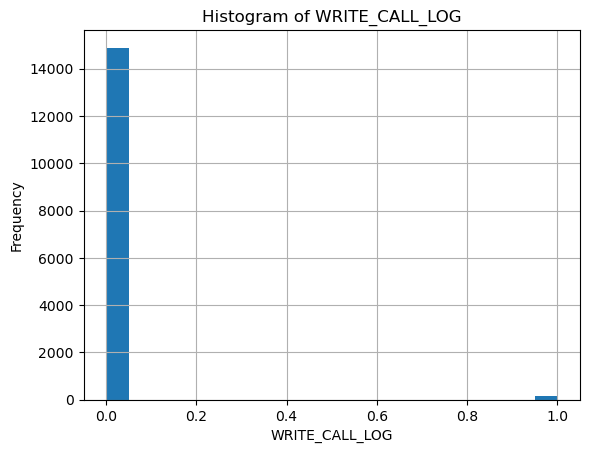

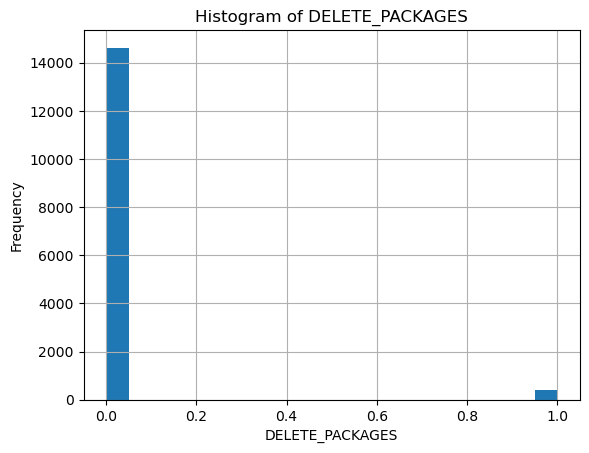

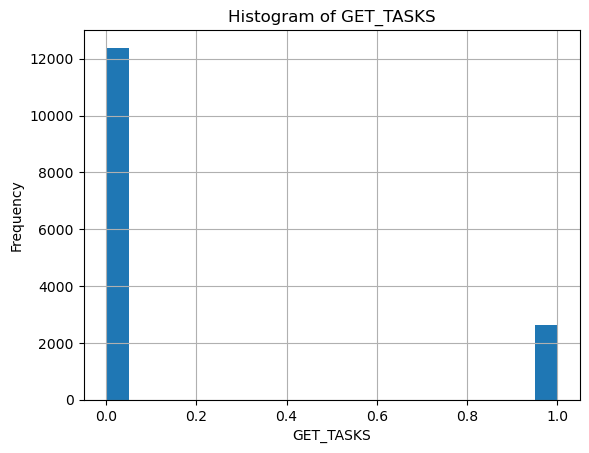

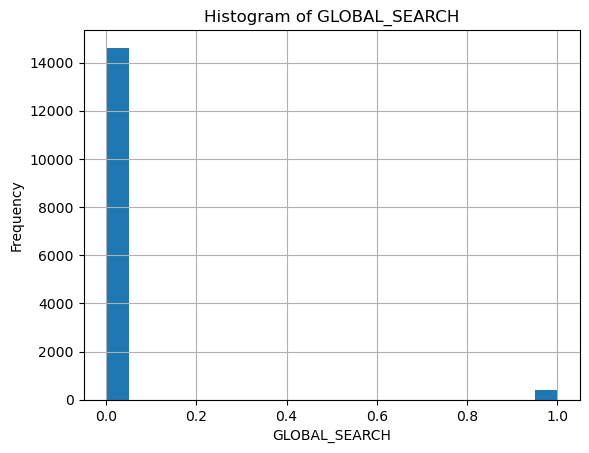

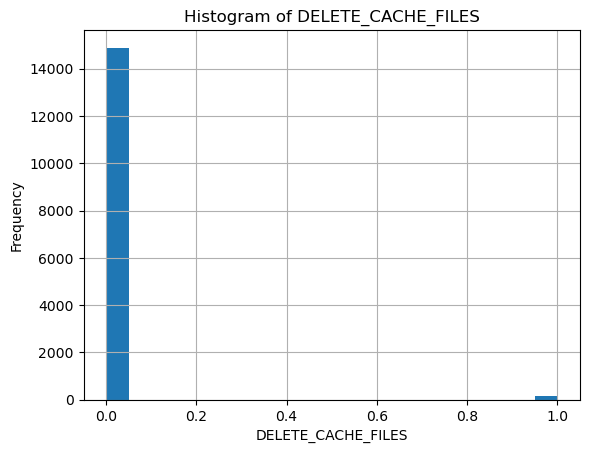

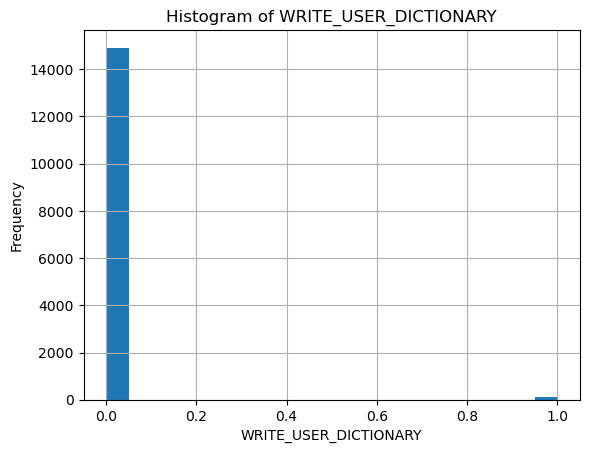

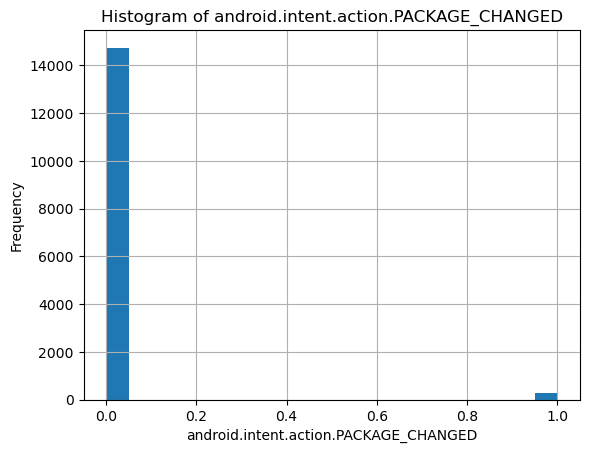

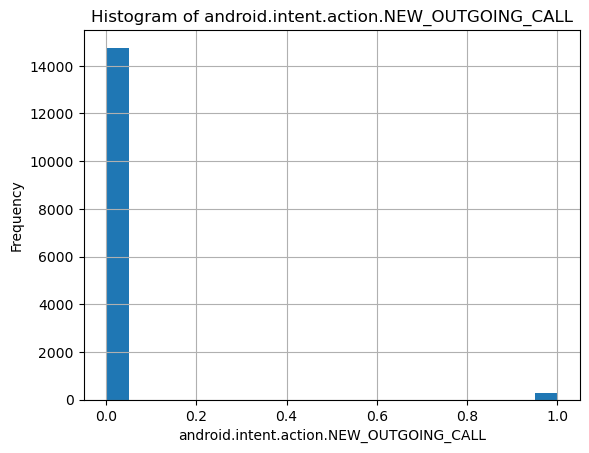

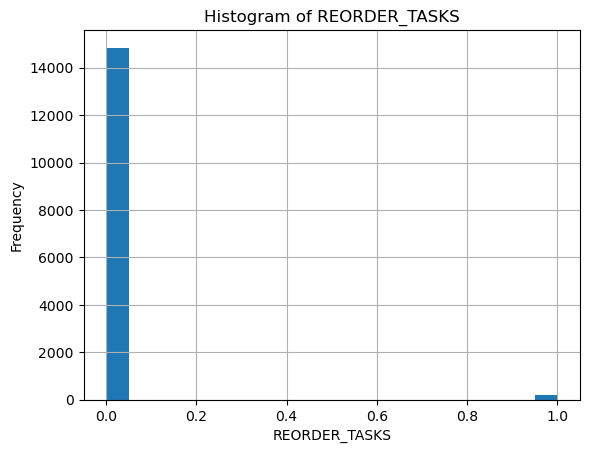

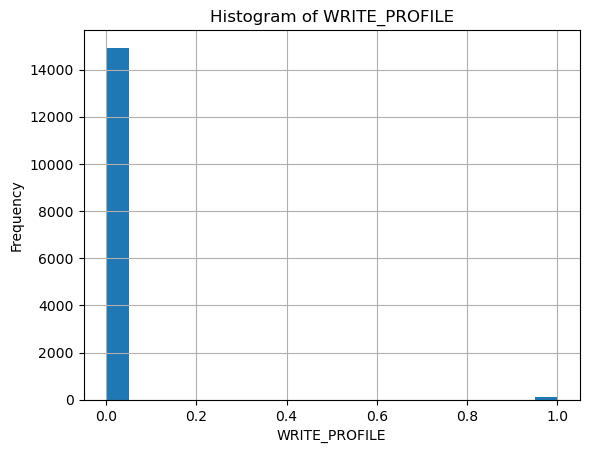

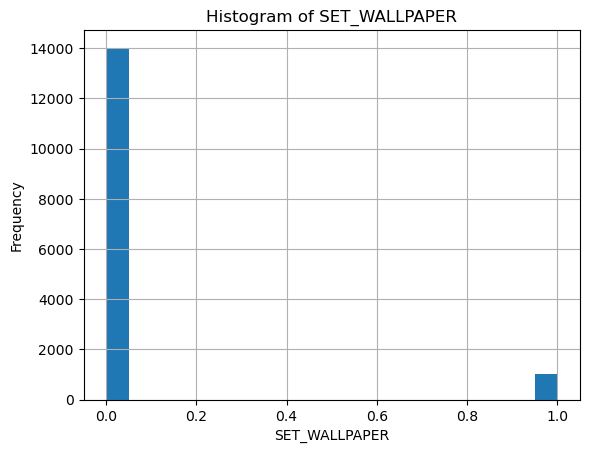

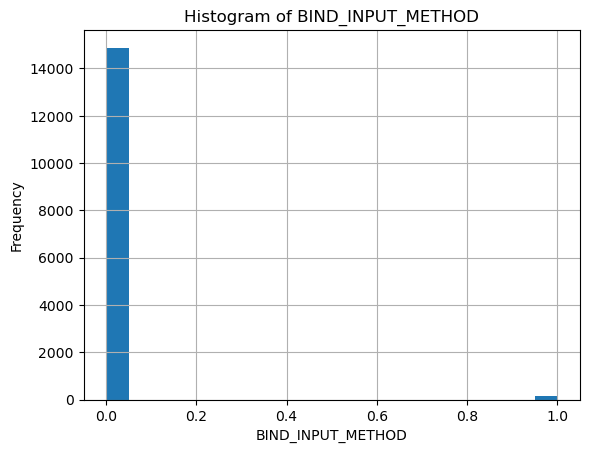

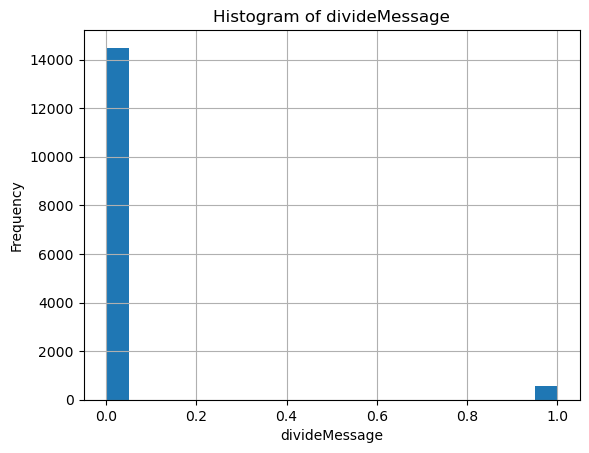

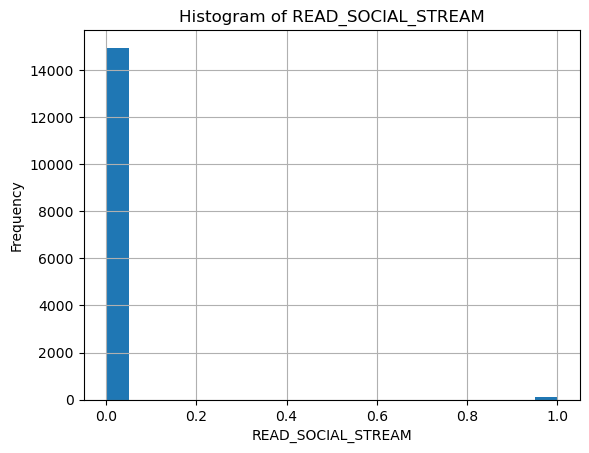

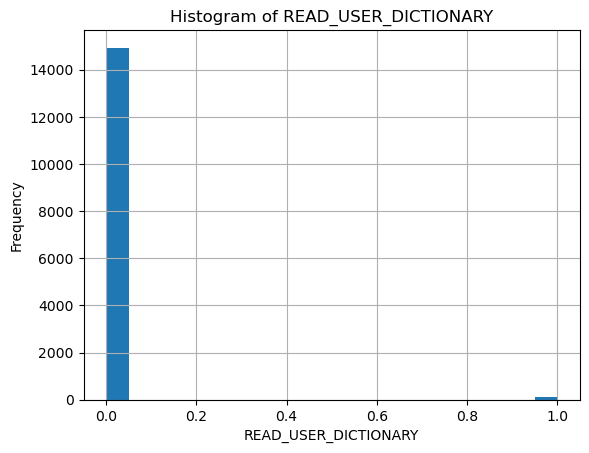

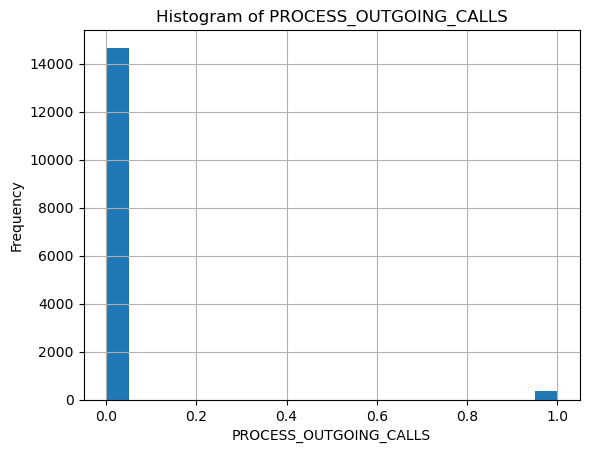

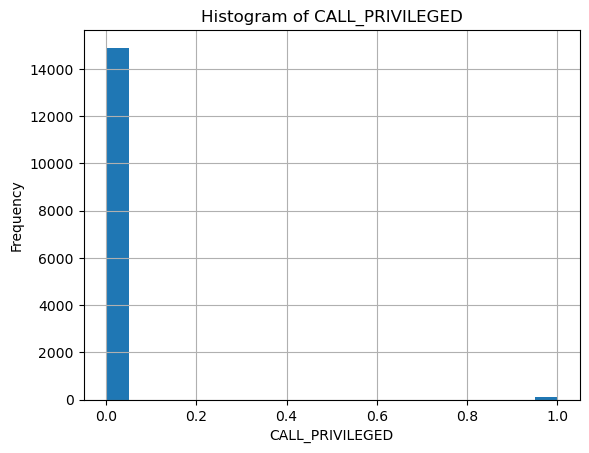

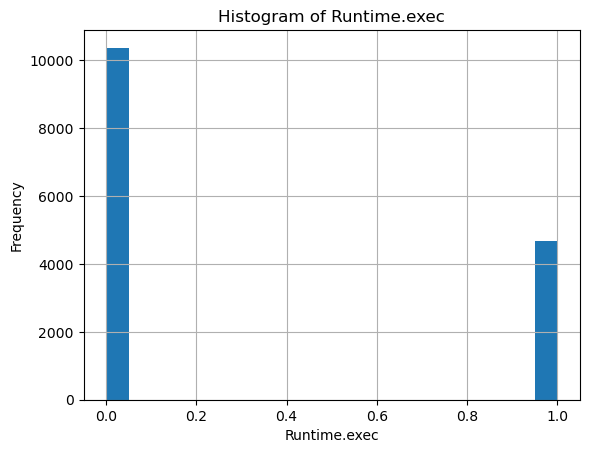

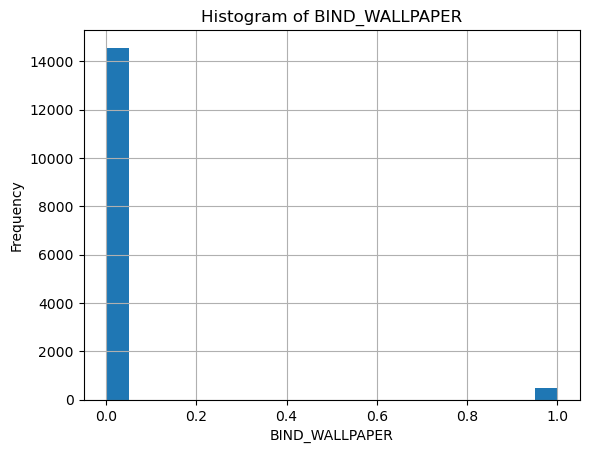

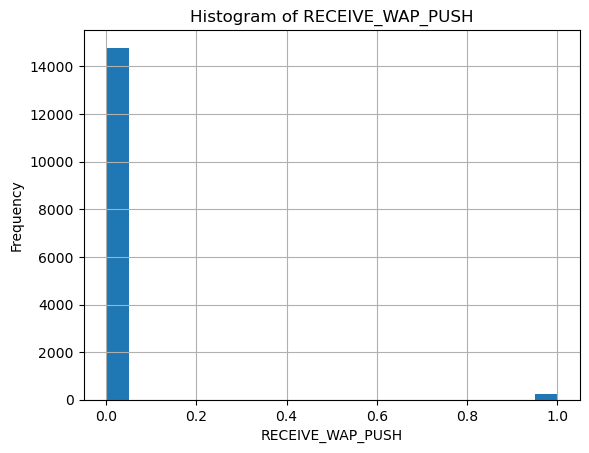

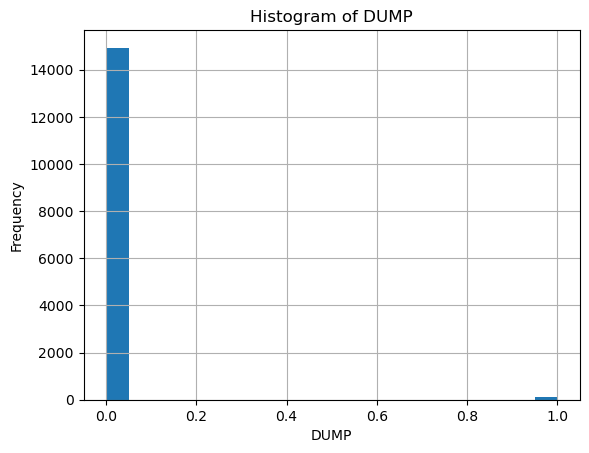

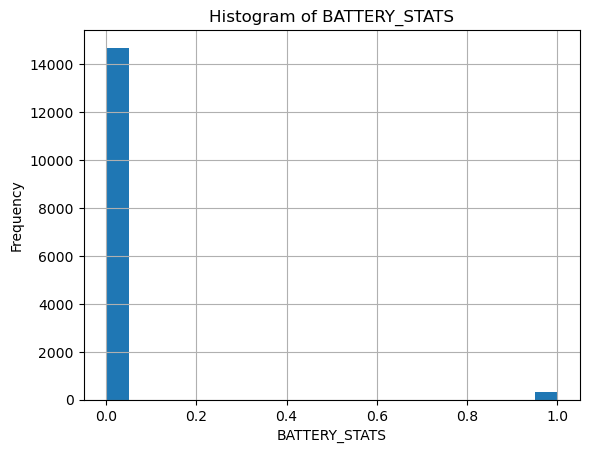

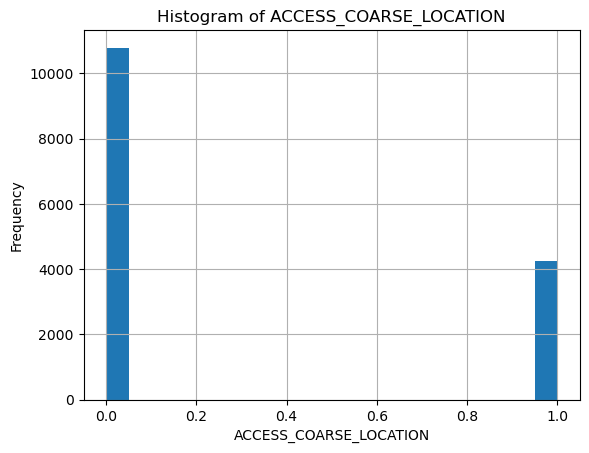

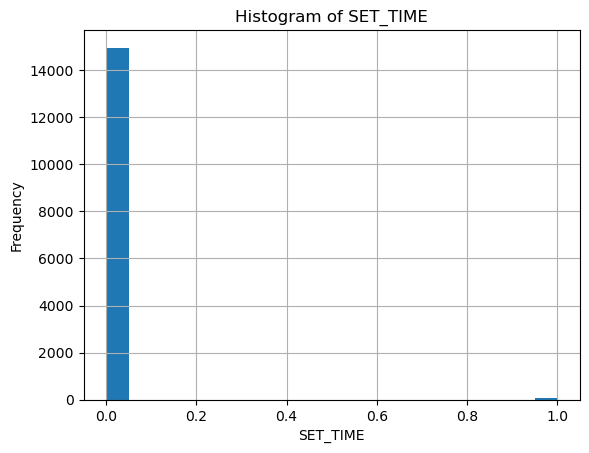

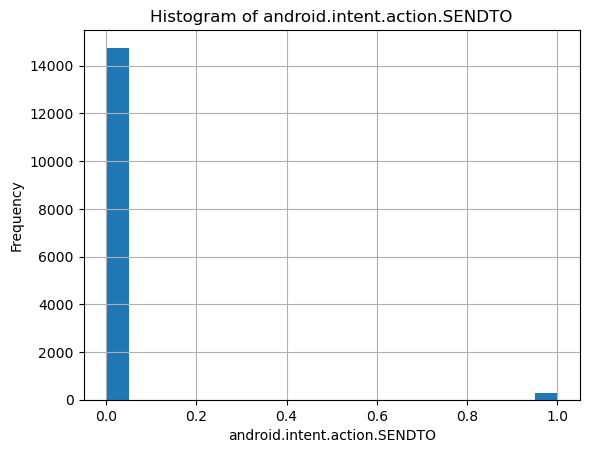

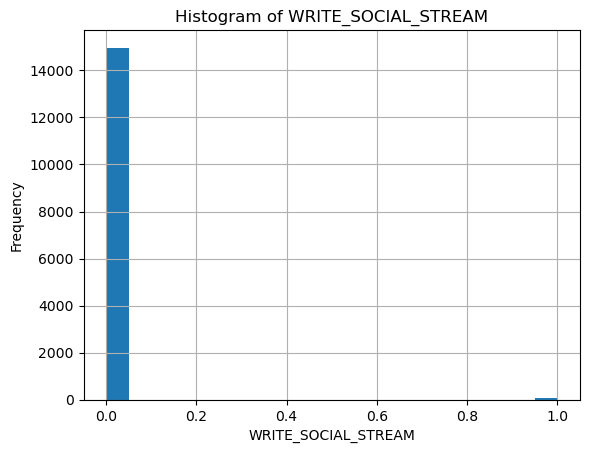

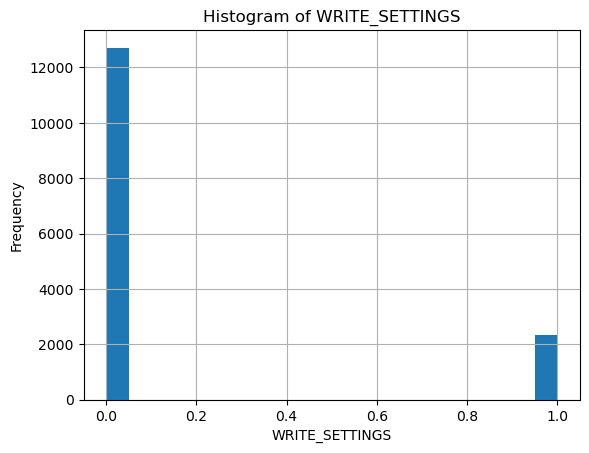

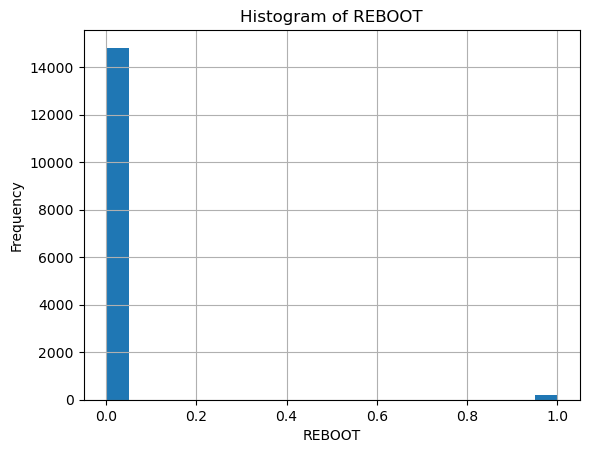

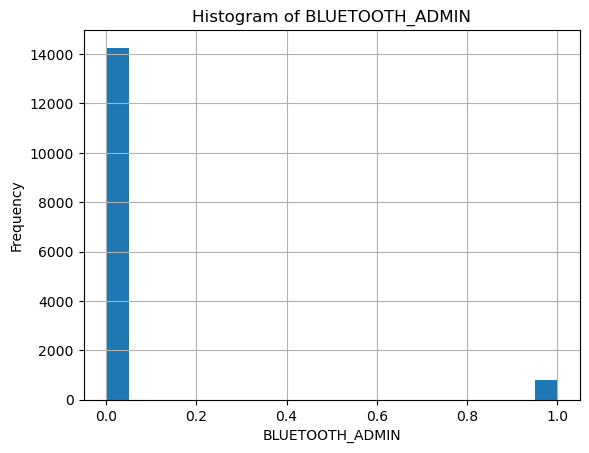

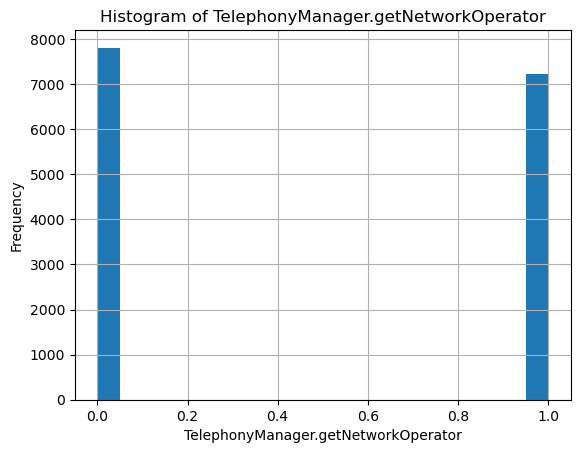

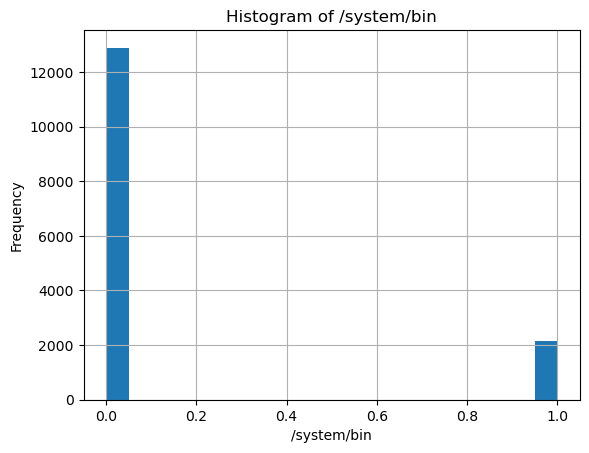

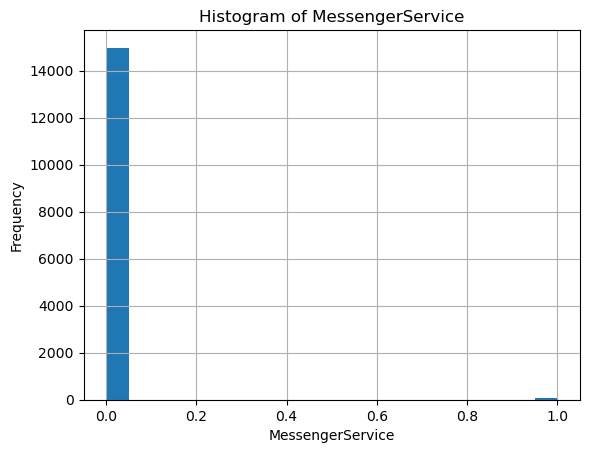

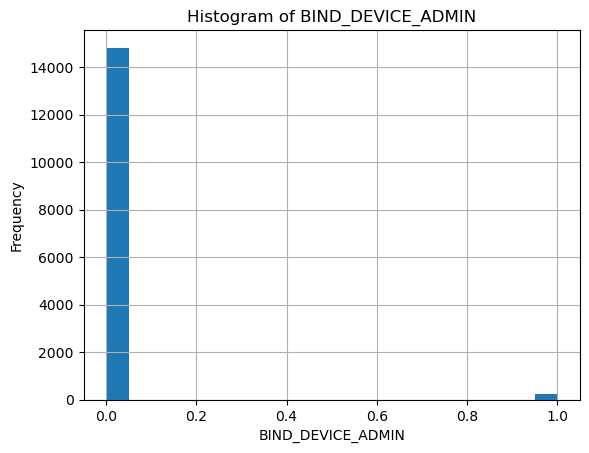

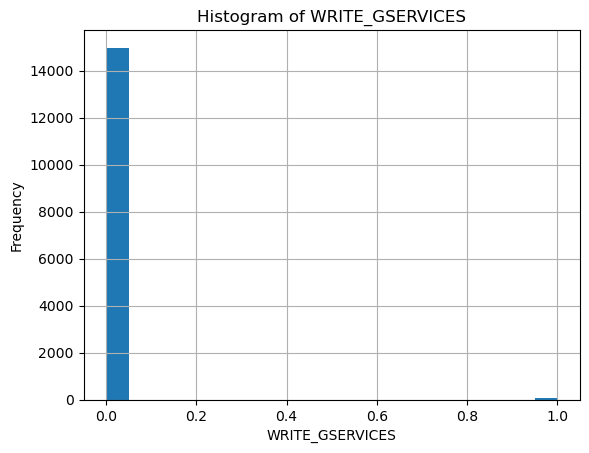

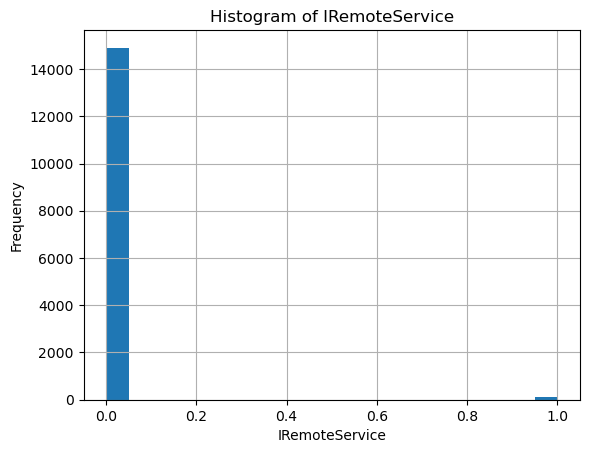

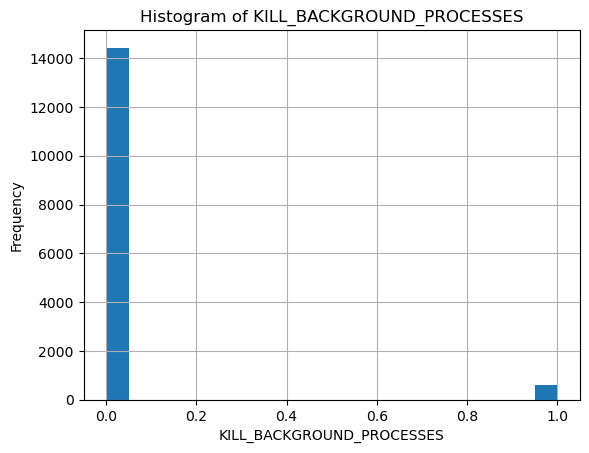

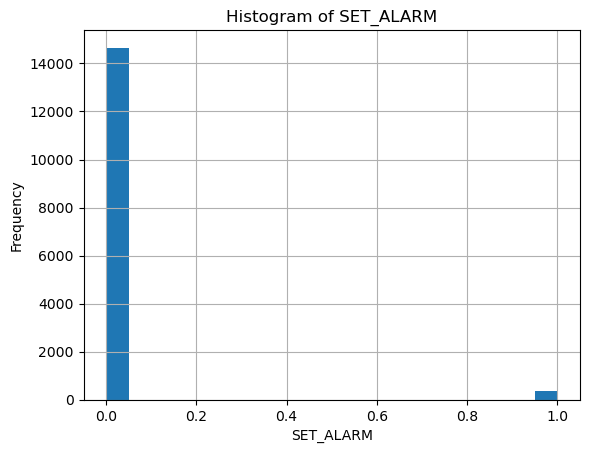

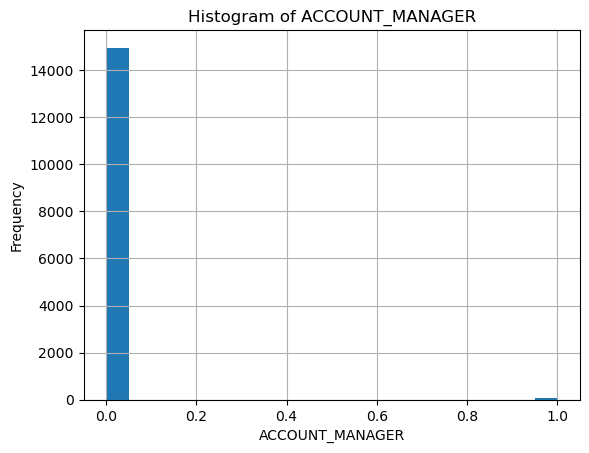

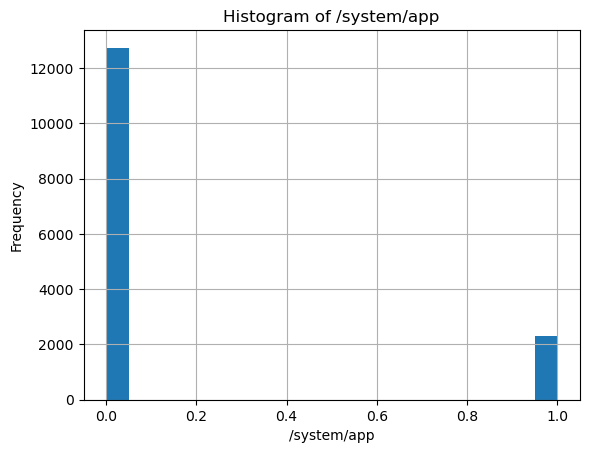

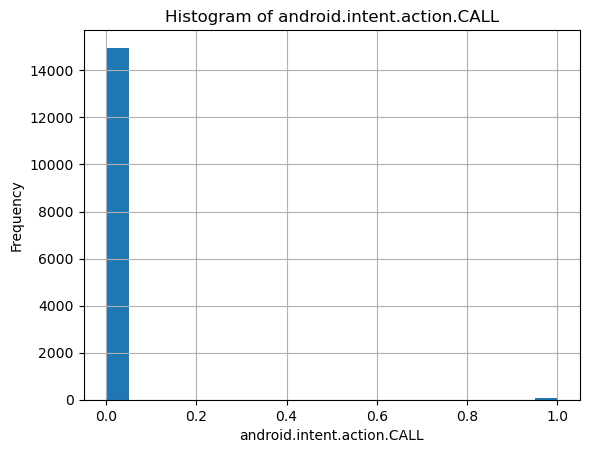

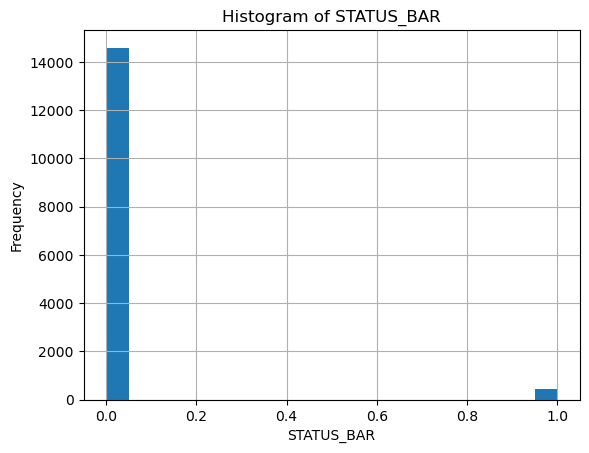

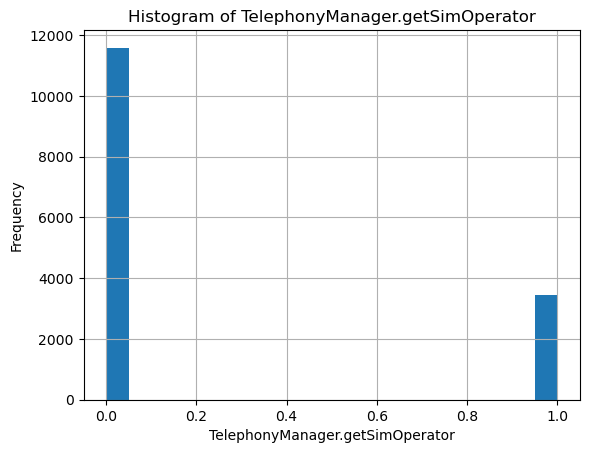

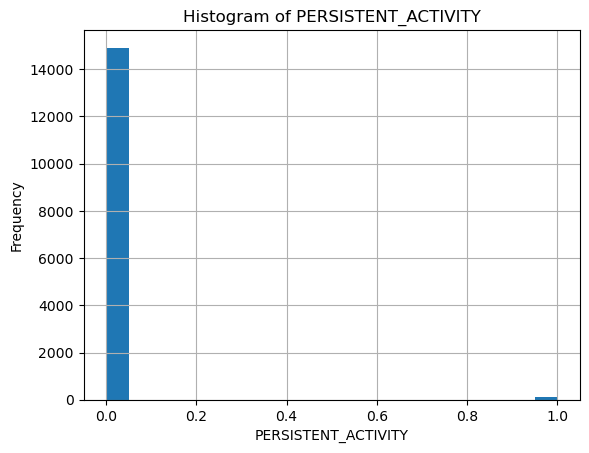

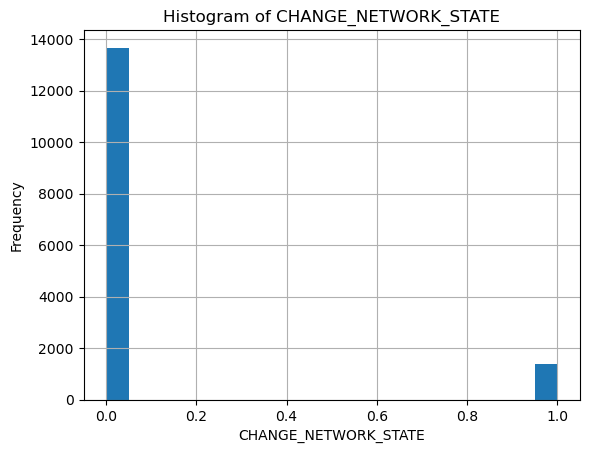

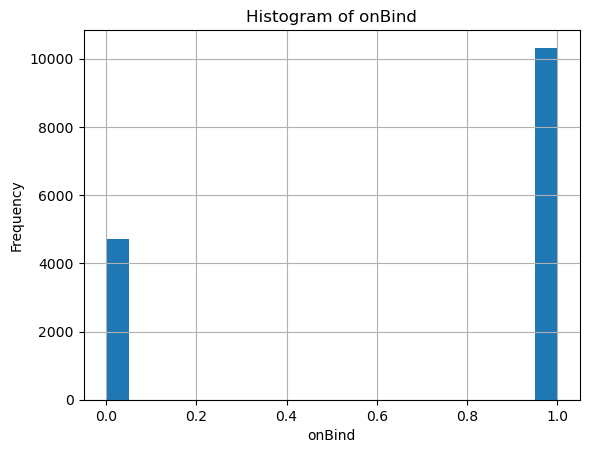

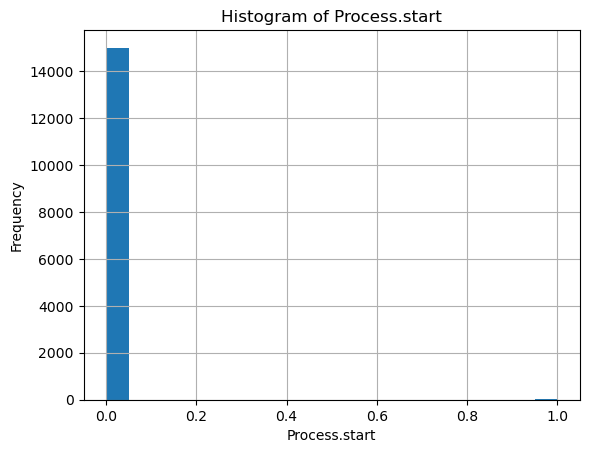

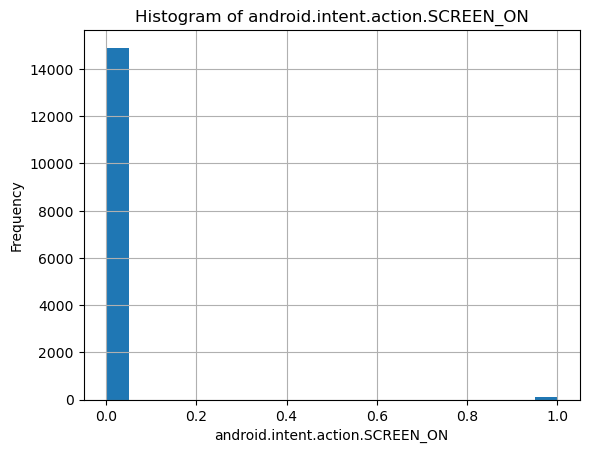

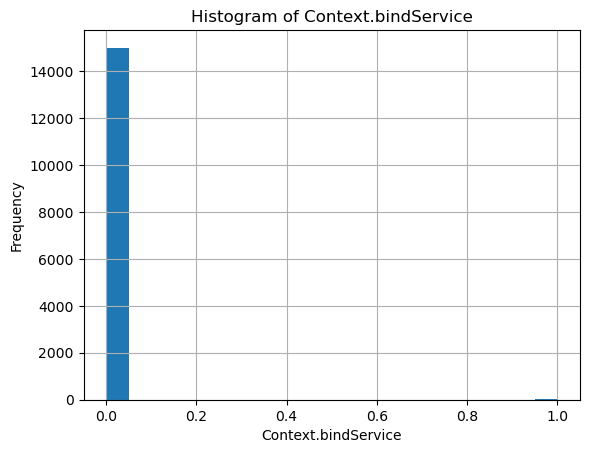

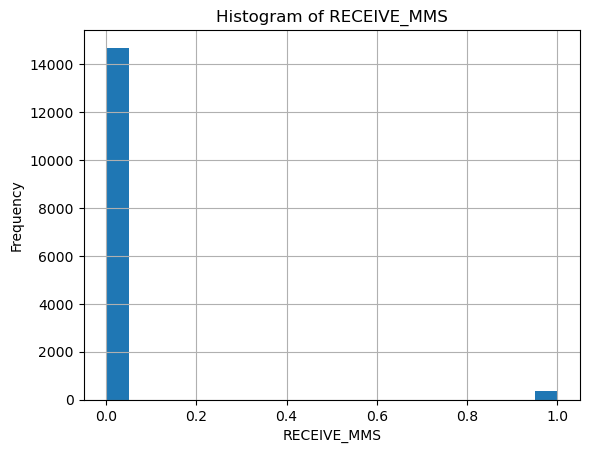

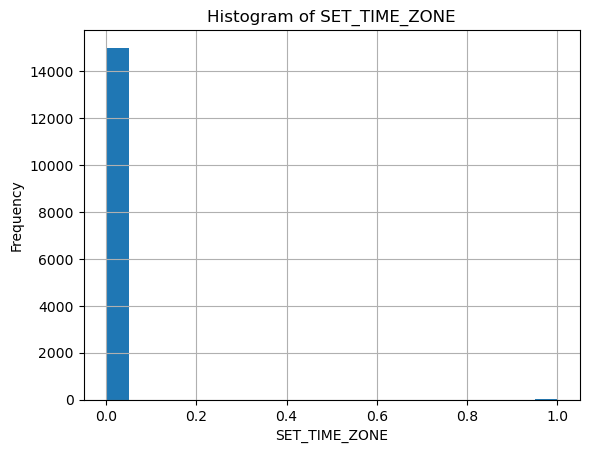

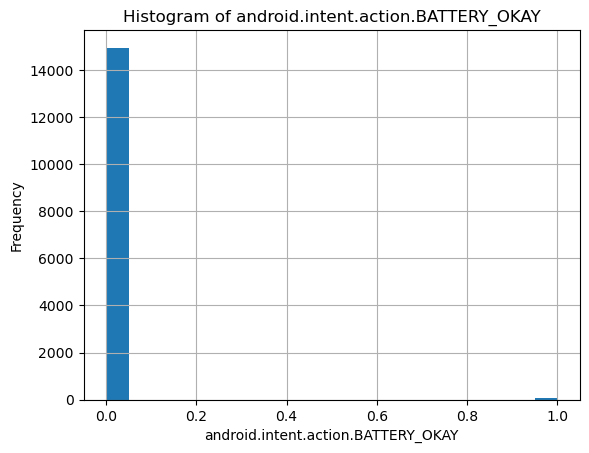

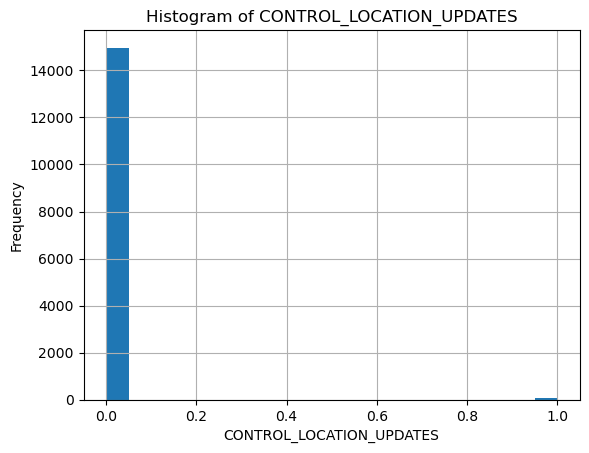

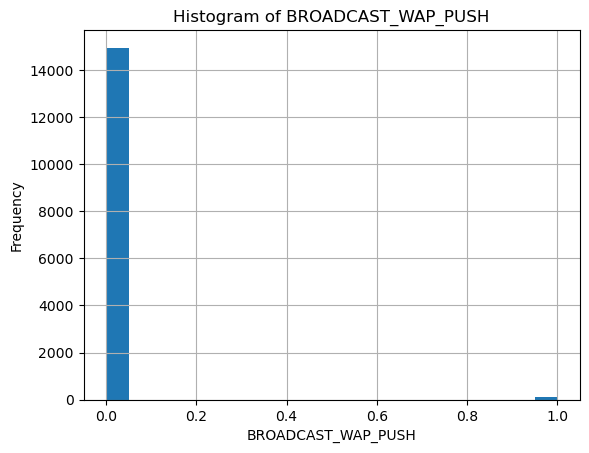

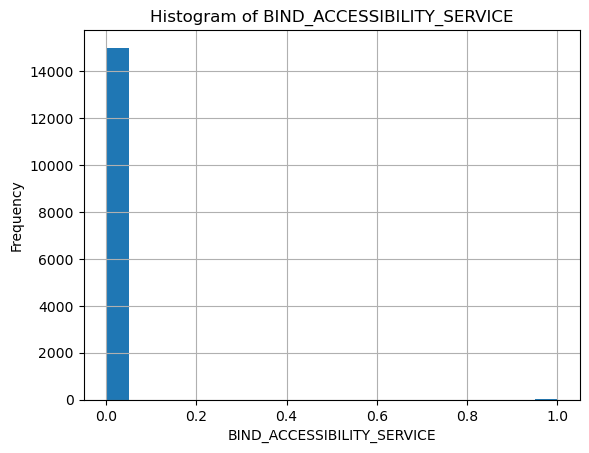

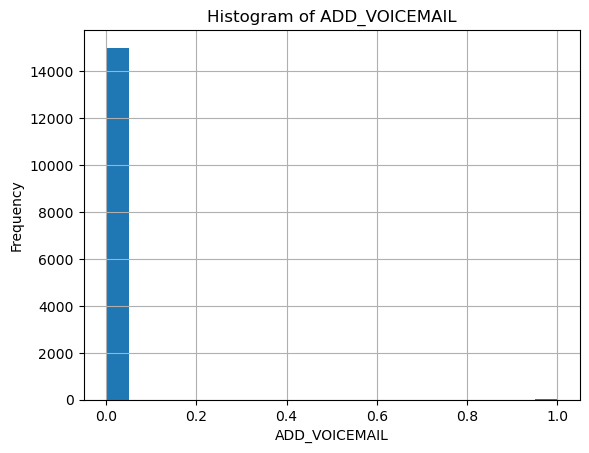

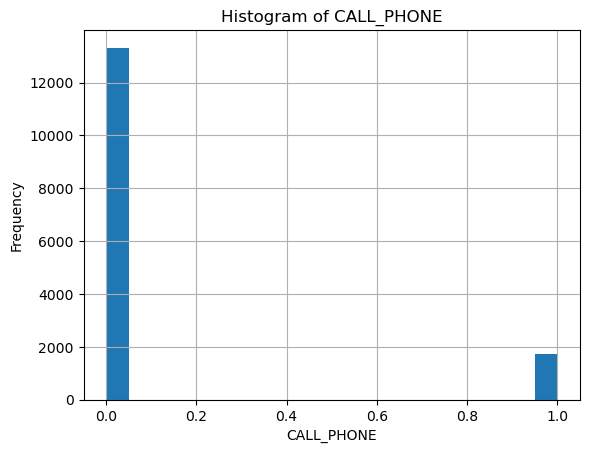

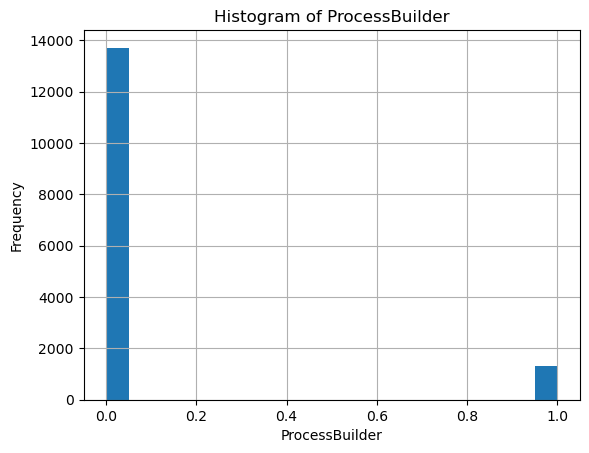

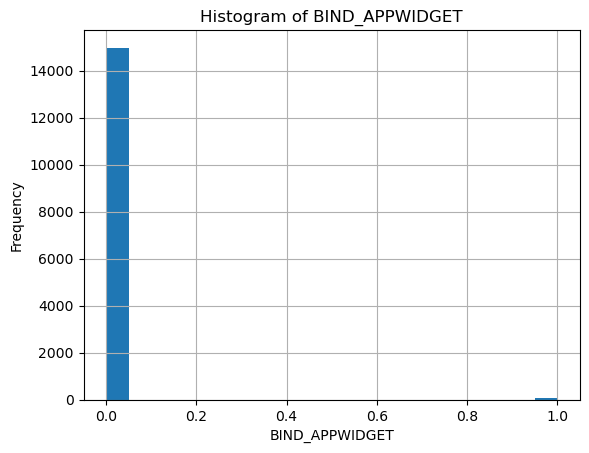

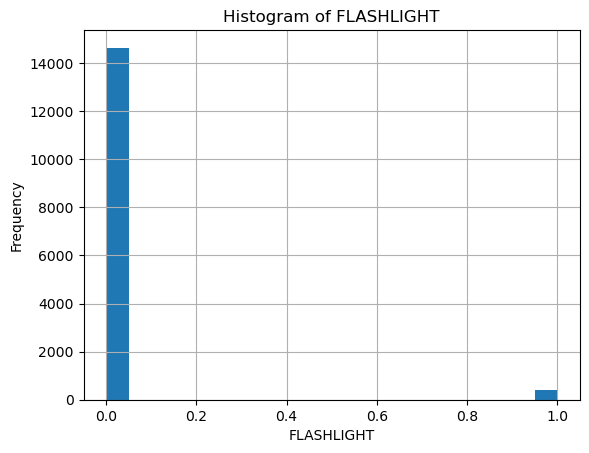

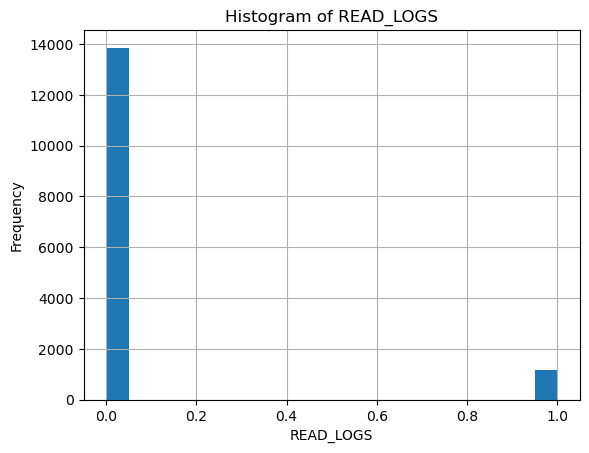

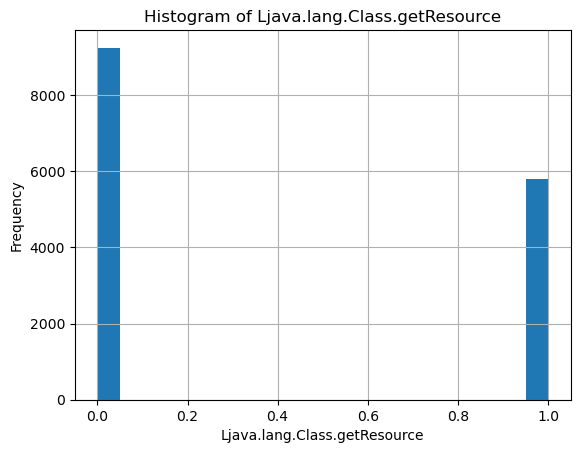

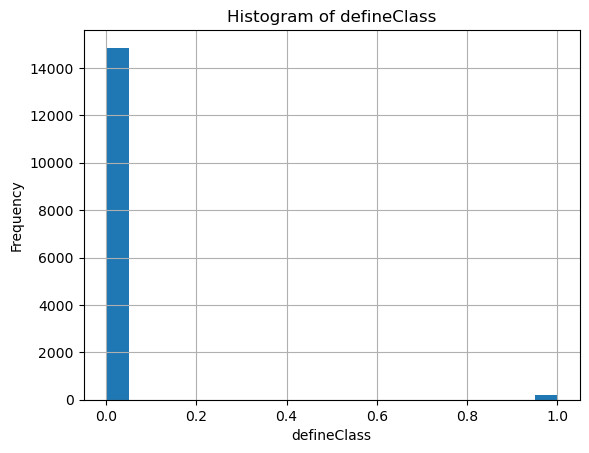

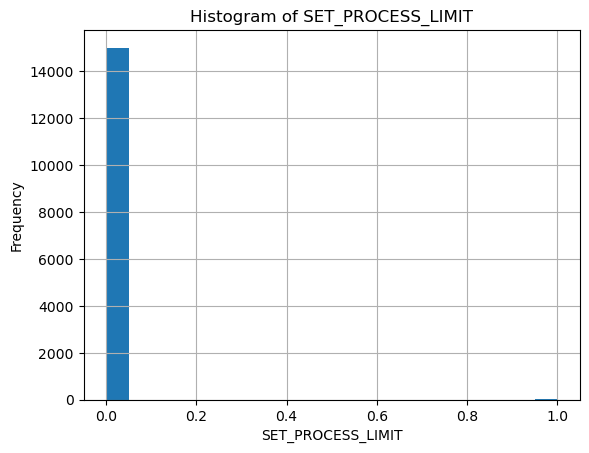

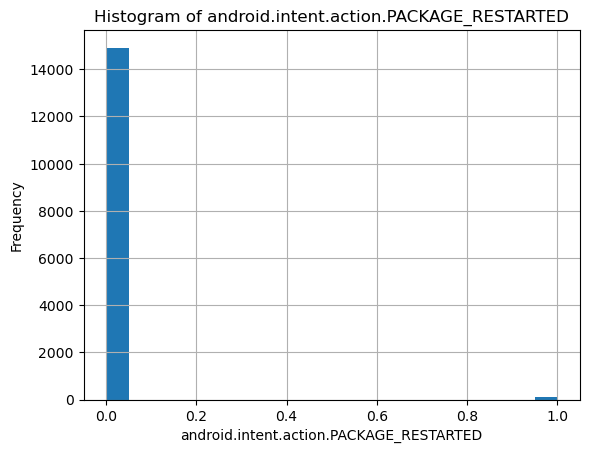

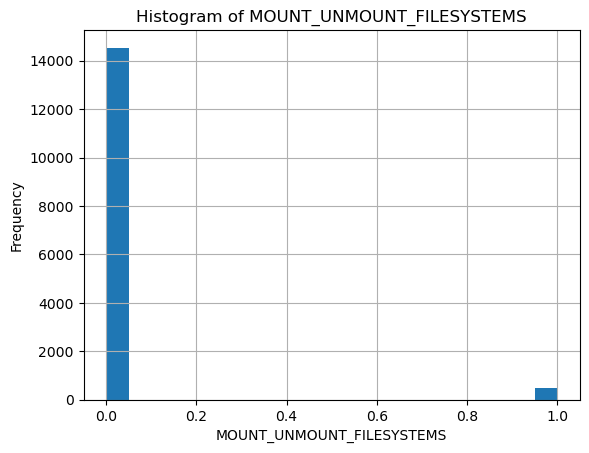

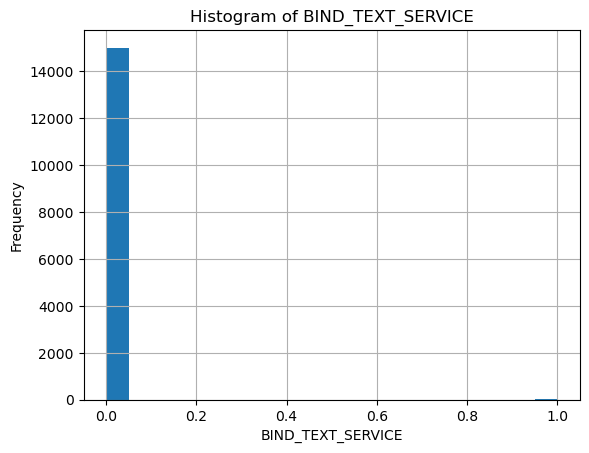

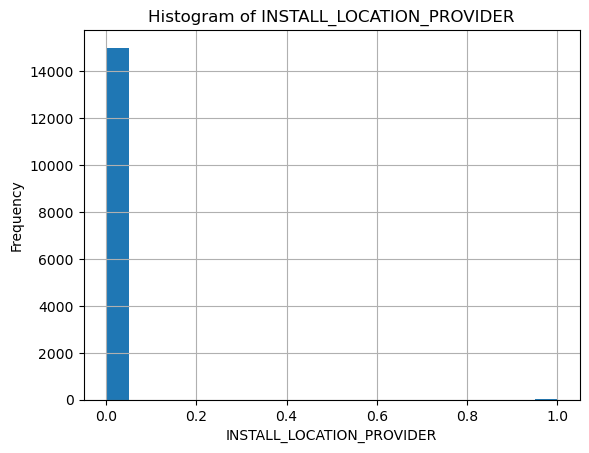

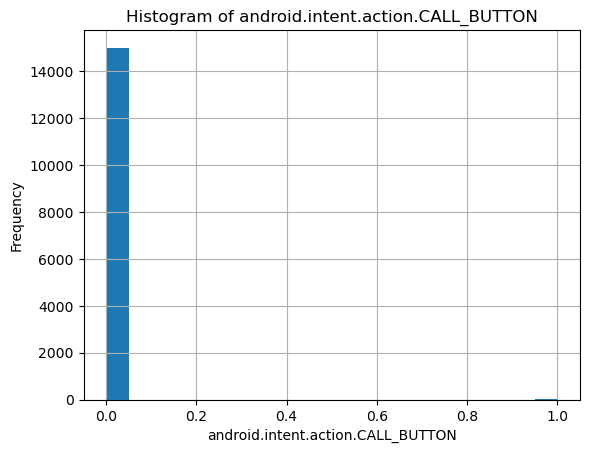

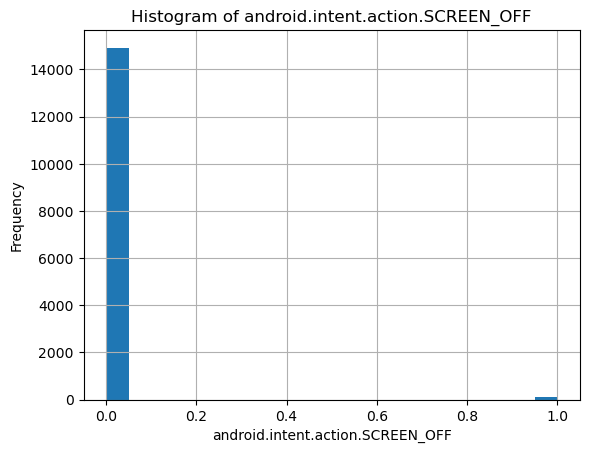

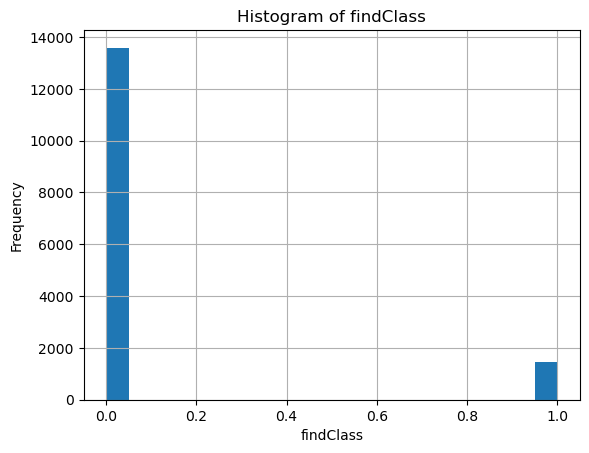

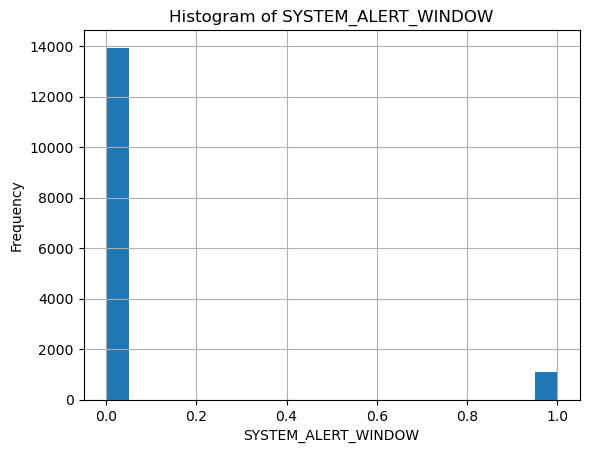

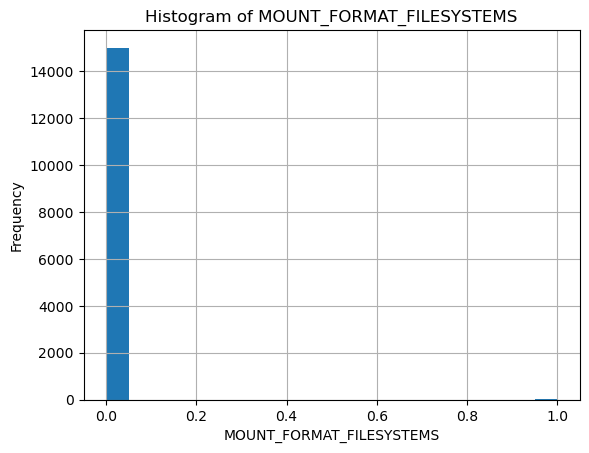

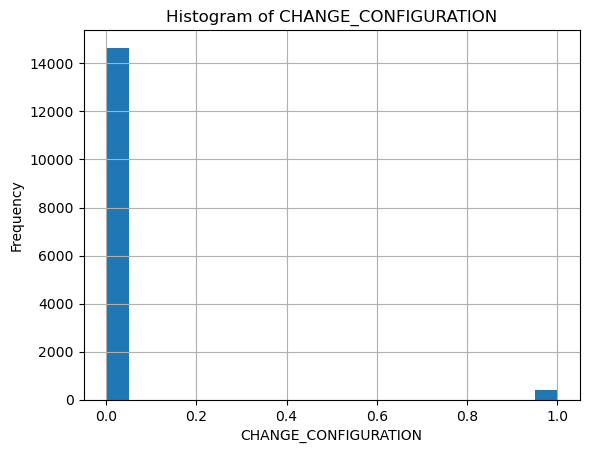

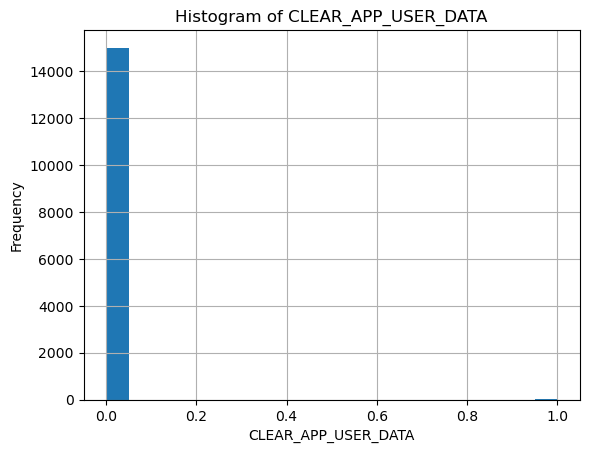

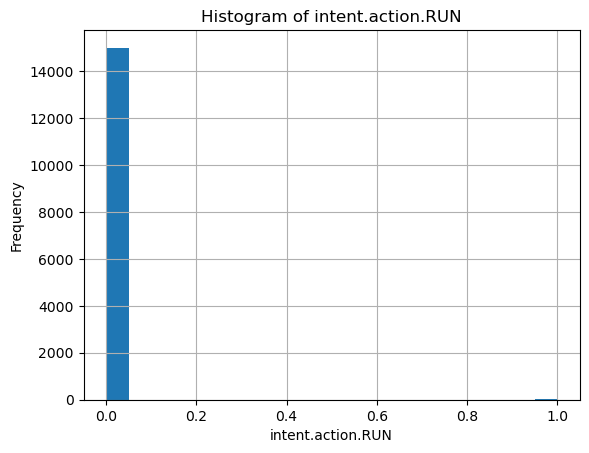

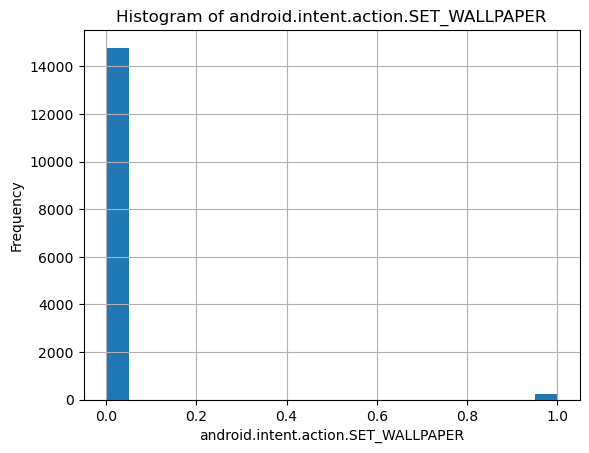

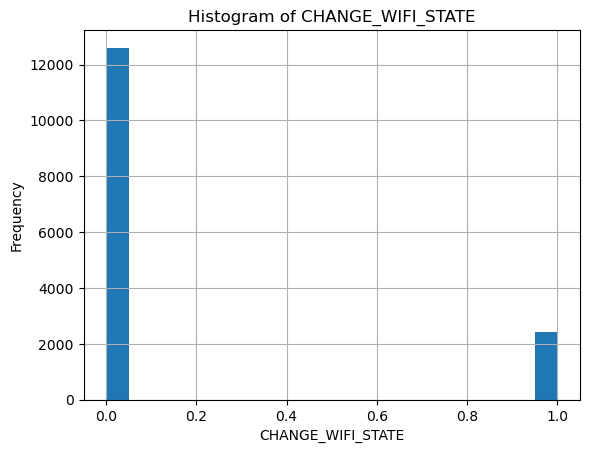

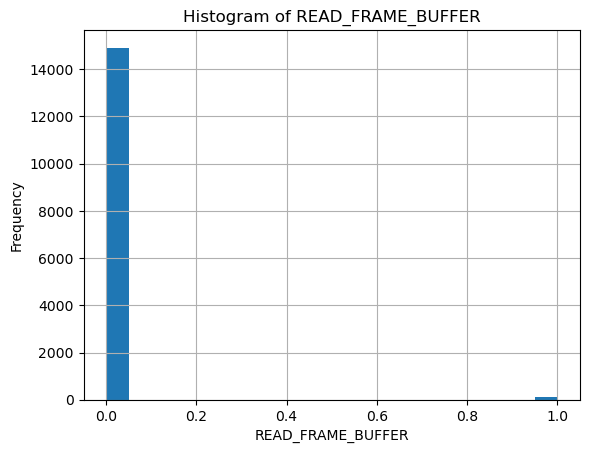

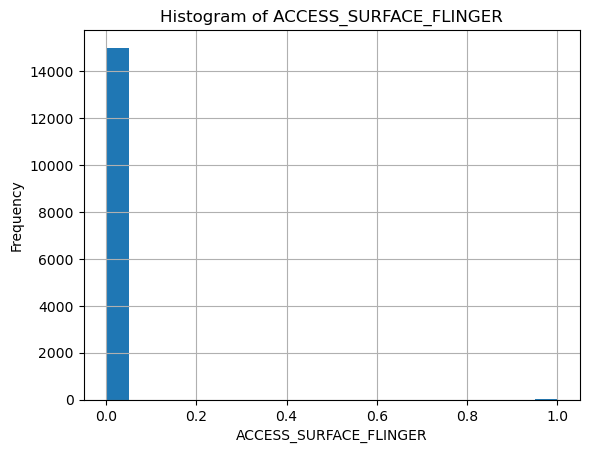

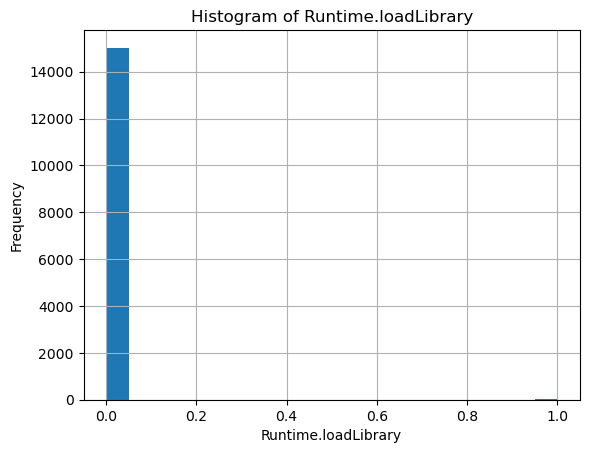

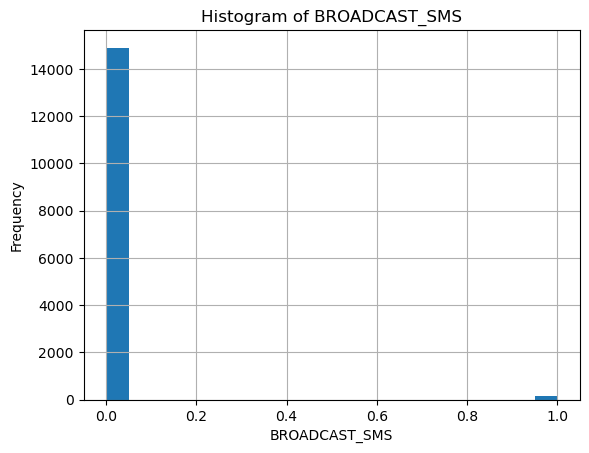

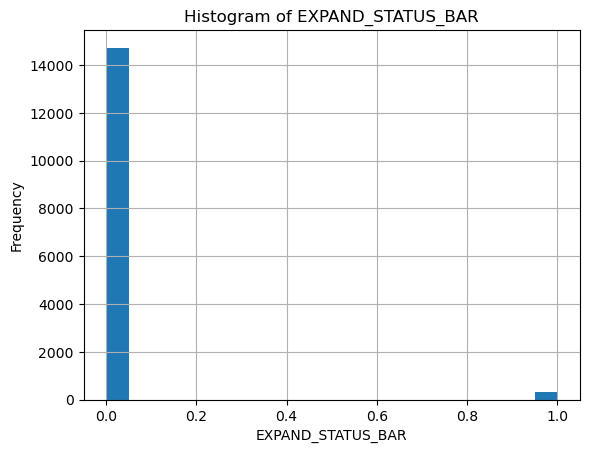

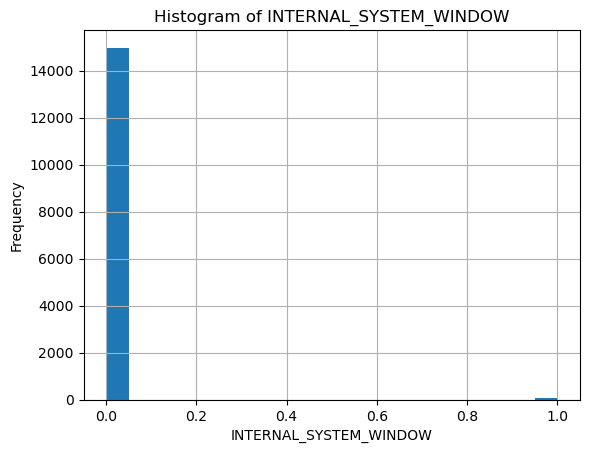

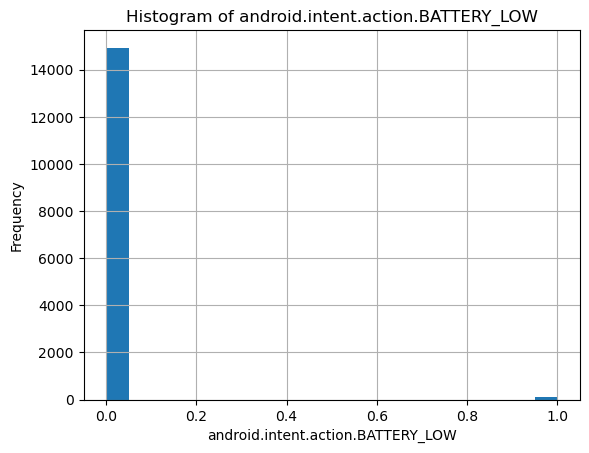

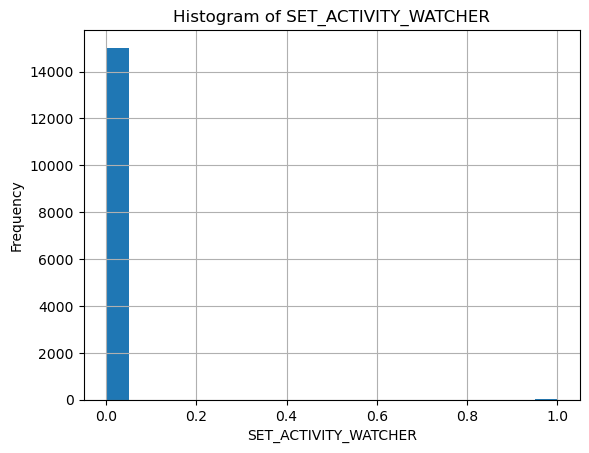

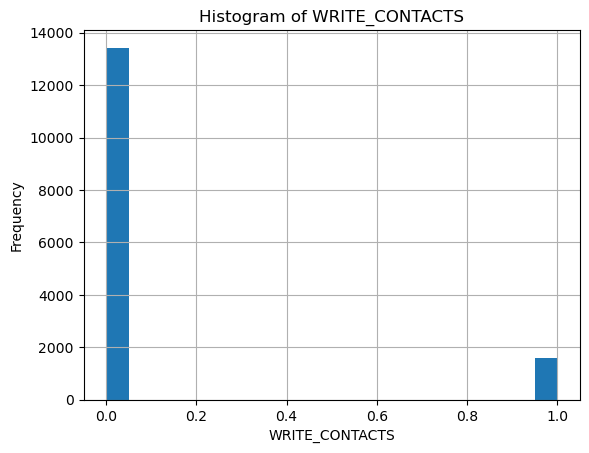

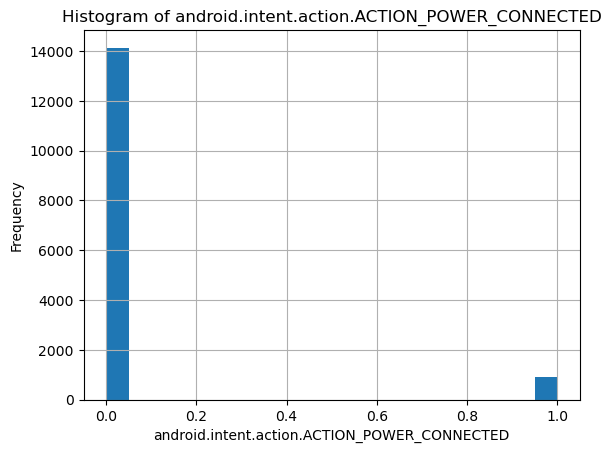

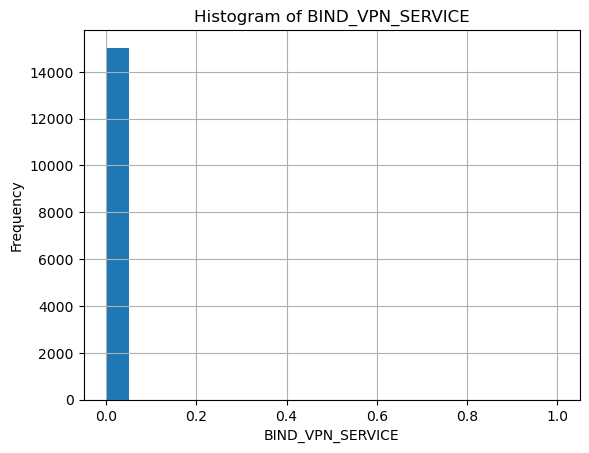

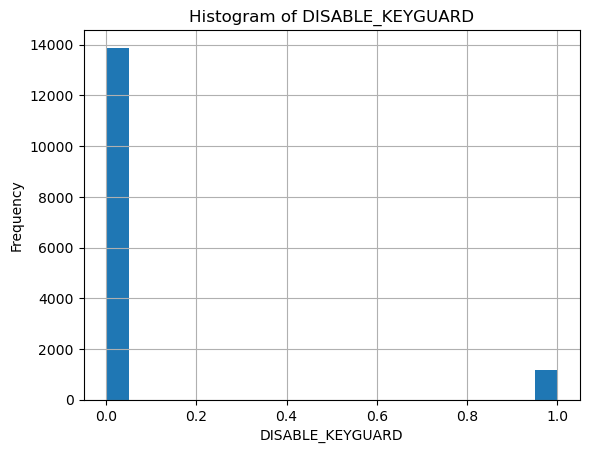

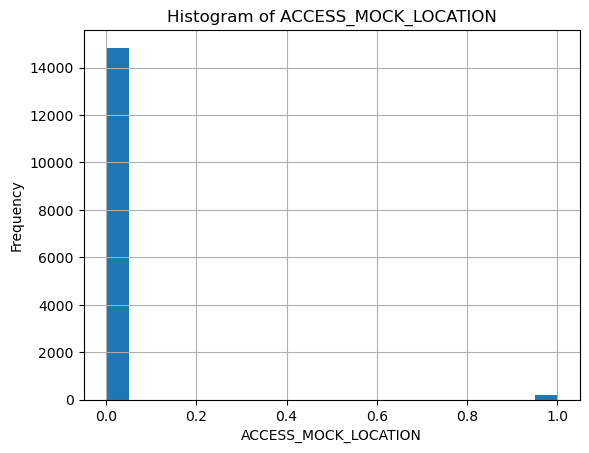

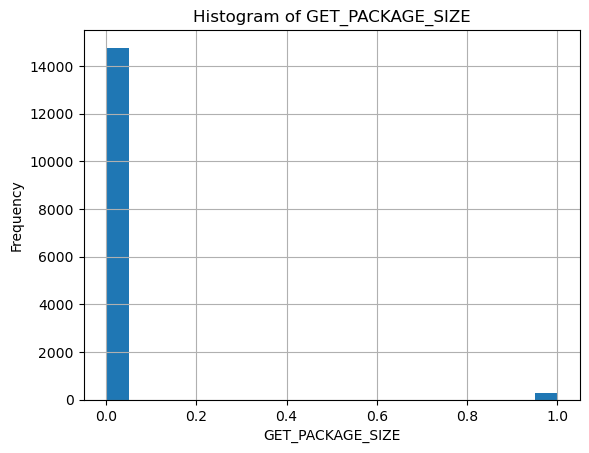

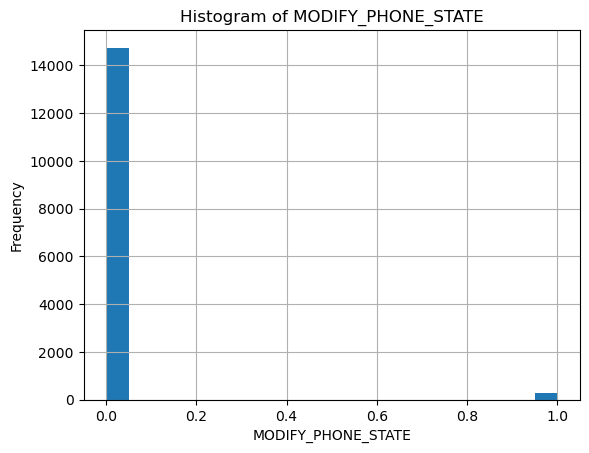

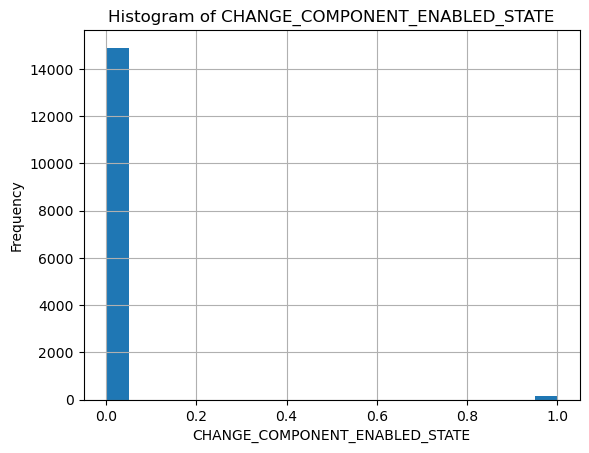

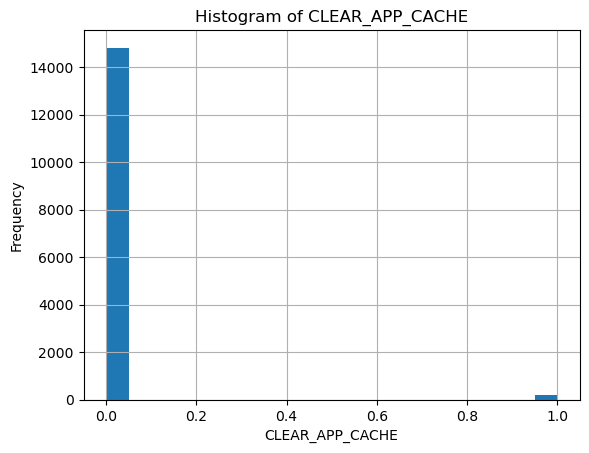

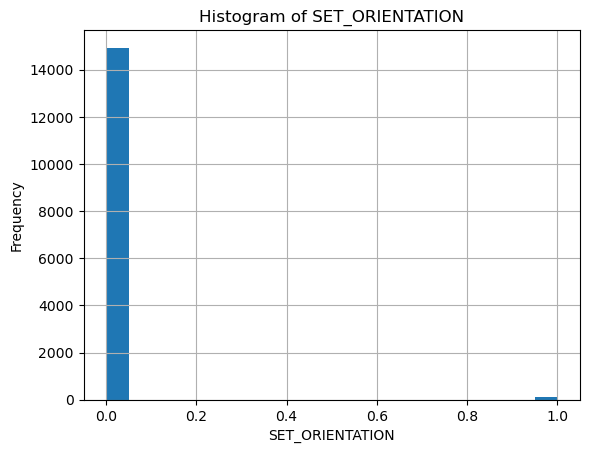

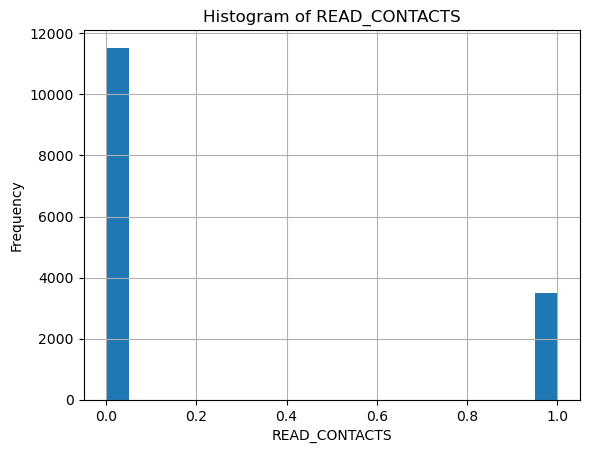

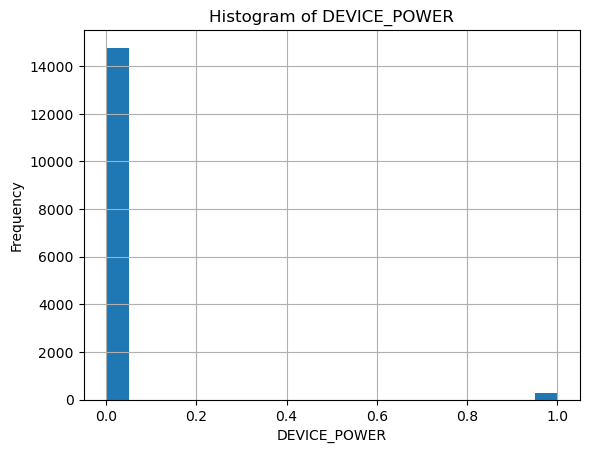

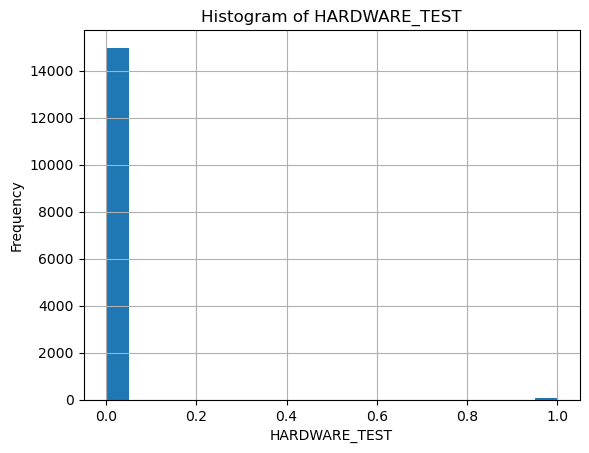

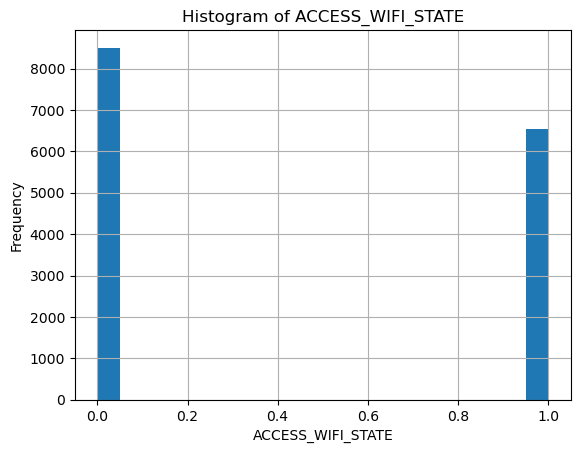

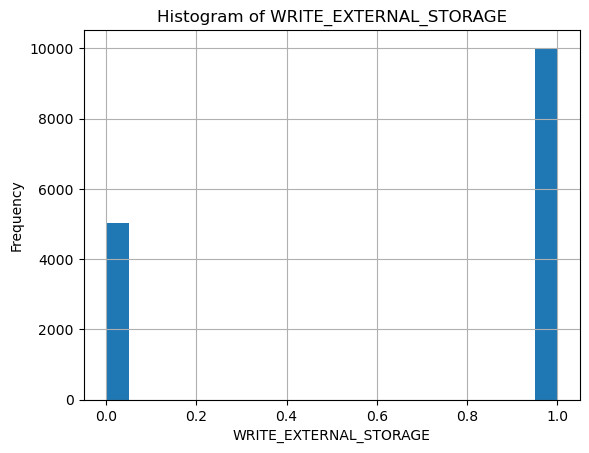

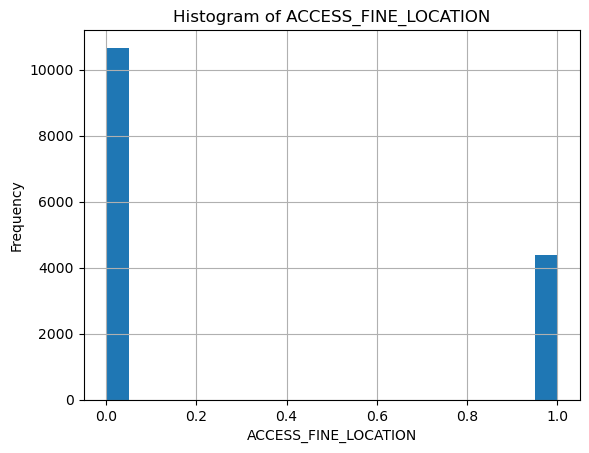

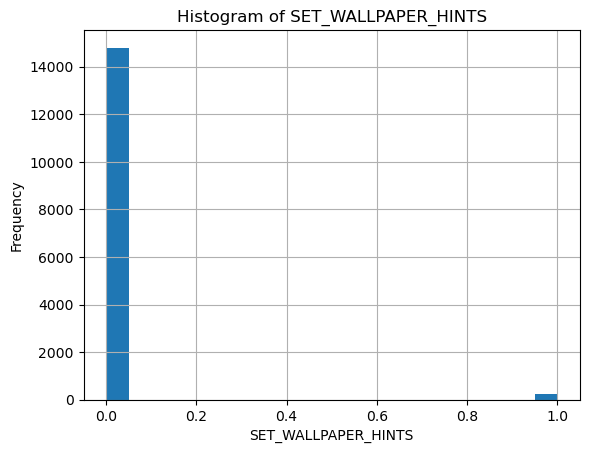

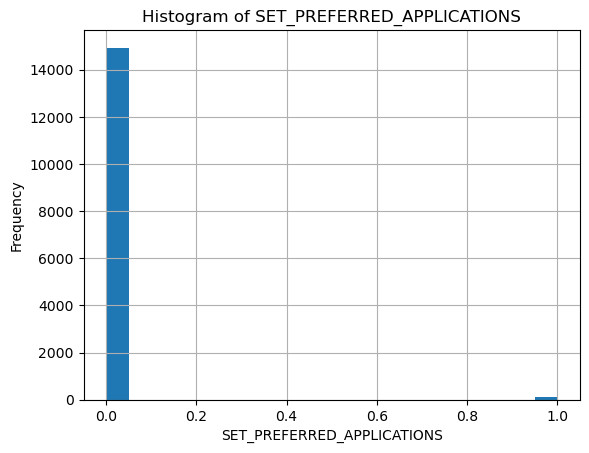

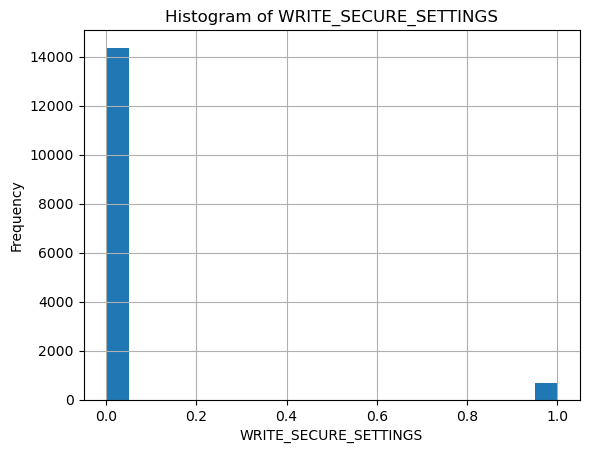

In [108]:
numerical_columns = drebin_data.select_dtypes(include='int64').columns.tolist()
for col in numerical_columns:
    drebin_data[col].hist(bins=20)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()


**Bar Plot for Categorical Columns:**

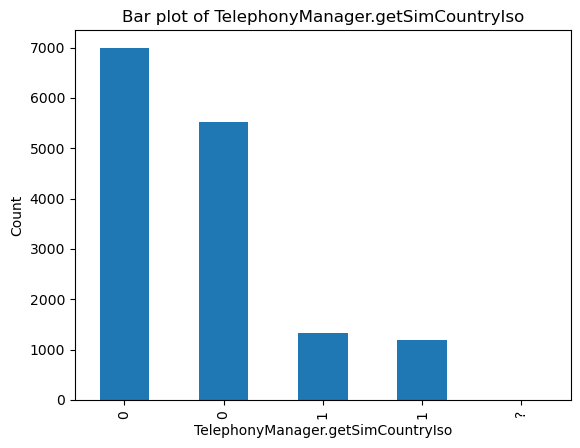

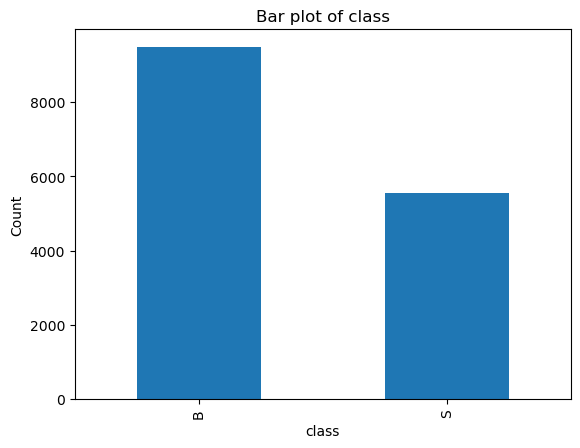

In [109]:
# Bar plot for categorical columns
for col in categorical_columns:
    drebin_data[col].value_counts().plot(kind='bar')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Bar plot of {col}')
    plt.show()


**Correlation Heatmap:**

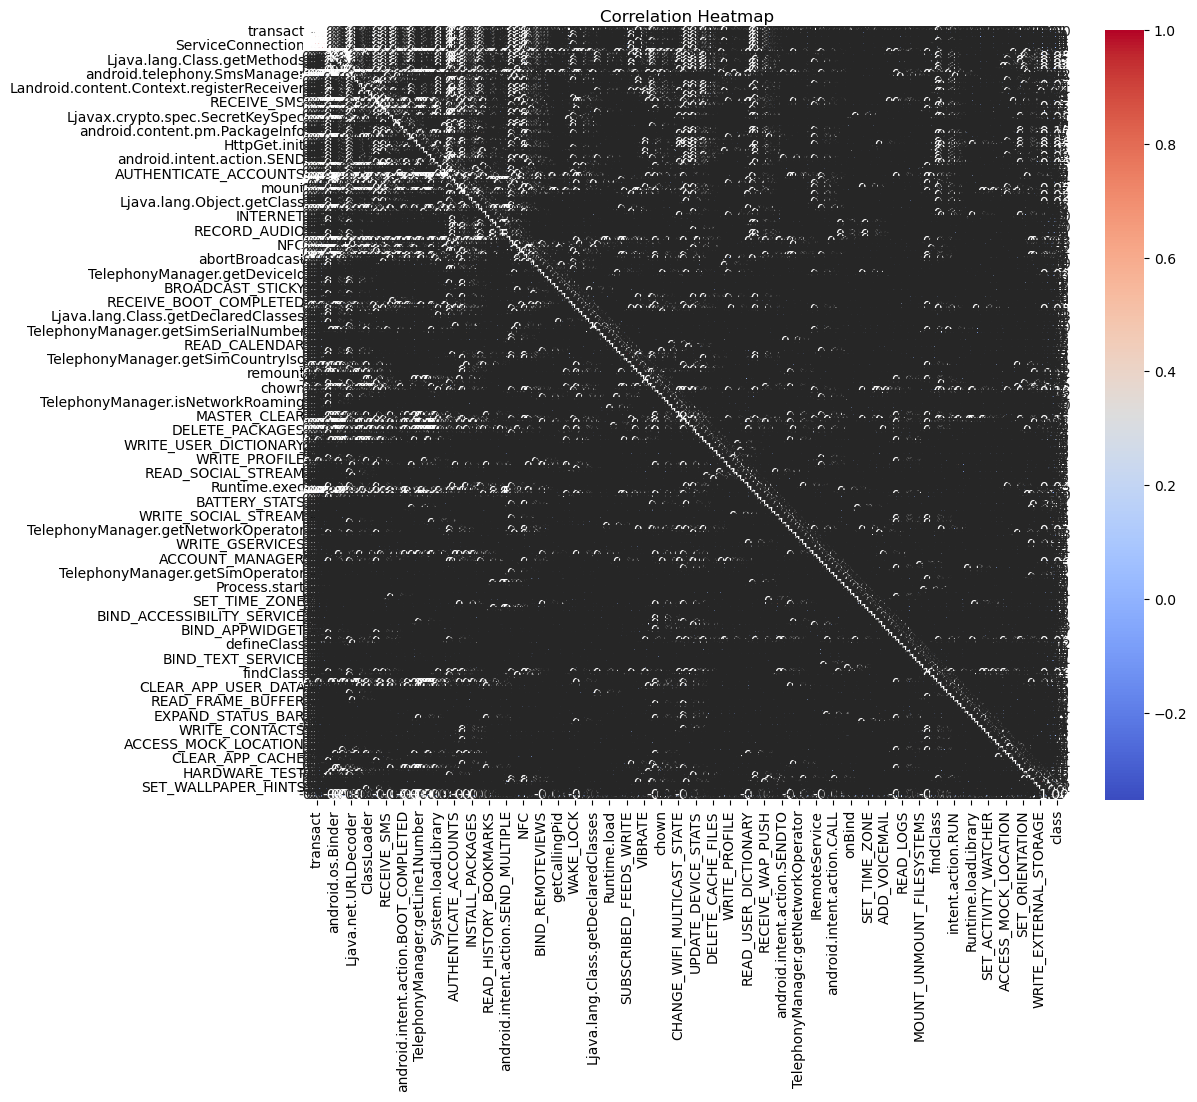

In [35]:
# Replace non-numeric values ('S' and '?') with NaN
drebin_data.replace(['?', 'S','B'], np.nan, inplace=True)

# Convert columns to numeric type
drebin_data = drebin_data.apply(pd.to_numeric, errors='ignore')

# Correlation heatmap for numerical columns
correlation_matrix = drebin_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


<h3>3. Understanding Target Variable:</h3>
    
**Class Distribution:**

In [110]:
# Class distribution (assuming 'class' is the target variable)
class_distribution = drebin_data['class'].value_counts()
print(class_distribution)


class
B    9476
S    5560
Name: count, dtype: int64


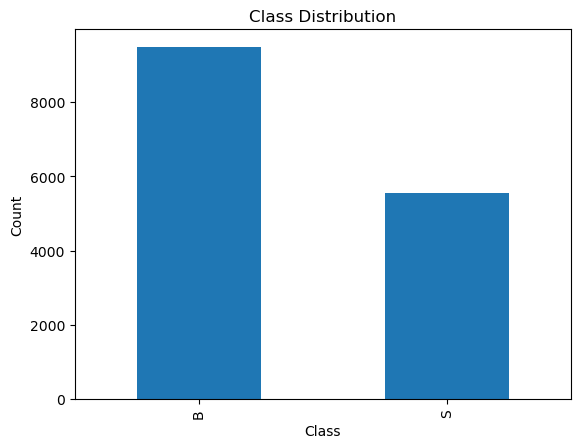

In [111]:
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


In [112]:
# Identify columns with missing values
columns_with_missing = drebin_data.columns[drebin_data.isnull().any()].tolist()
print("Columns with missing values:", columns_with_missing)

# Impute missing values with strategies like mean, median, mode, or others for numerical columns
for col in columns_with_missing:
    if drebin_data[col].dtype == 'float64' or drebin_data[col].dtype == 'int64':
        drebin_data[col].fillna(drebin_data[col].mean(), inplace=True)
    else:
        drebin_data[col].fillna(drebin_data[col].mode()[0], inplace=True)  # For categorical columns

# Check if missing values have been handled
print("Columns with missing values after handling:", drebin_data.columns[drebin_data.isnull().any()].tolist())


Columns with missing values: []
Columns with missing values after handling: []


In [113]:
# Check and list categorical columns for potential encoding
categorical_columns = drebin_data.select_dtypes(include='object').columns.tolist()
print("Categorical columns:", categorical_columns)

# If categorical columns need encoding (using one-hot encoding as an example)
drebin_data_encoded = pd.get_dummies(drebin_data, columns=categorical_columns)


Categorical columns: ['TelephonyManager.getSimCountryIso', 'class']


In [119]:
# Identify numeric and non-numeric columns
numeric_columns = drebin_data.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_columns = drebin_data.select_dtypes(exclude=[np.number]).columns.tolist()

# Replace missing values in non-numeric columns with 'unknown'
drebin_data[non_numeric_columns] = drebin_data[non_numeric_columns].fillna('unknown')

# Replace missing values in numeric columns with their mean
drebin_data[numeric_columns] = drebin_data[numeric_columns].apply(lambda x: x.fillna(x.mean()))



In [121]:
# Split features and target variable
X = drebin_data.drop('class', axis=1)
y = drebin_data['class']

# Handle '?' values in a specific column
X['TelephonyManager.getSimCountryIso'].replace('?', 'unknown', inplace=True)

# Encode categorical column
label_encoder = LabelEncoder()
X['TelephonyManager.getSimCountryIso'] = label_encoder.fit_transform(X['TelephonyManager.getSimCountryIso'].astype(str))

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [129]:
# Models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('SVM', SVC())
]

accuracy_scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)  # Collect accuracy scores for each model
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           B       0.97      0.98      0.98      1863
           S       0.98      0.96      0.97      1145

    accuracy                           0.97      3008
   macro avg       0.97      0.97      0.97      3008
weighted avg       0.97      0.97      0.97      3008

Classification Report for Random Forest:
              precision    recall  f1-score   support

           B       0.99      1.00      0.99      1863
           S       0.99      0.98      0.99      1145

    accuracy                           0.99      3008
   macro avg       0.99      0.99      0.99      3008
weighted avg       0.99      0.99      0.99      3008

Classification Report for SVM:
              precision    recall  f1-score   support

           B       0.98      0.99      0.98      1863
           S       0.99      0.96      0.97      1145

    accuracy                           0.98      3008
   macro 

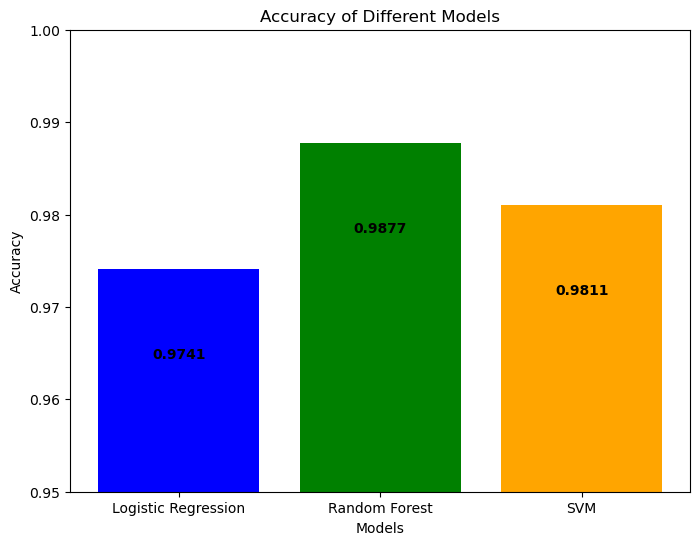

In [128]:
# Create an array of indices for the models
x = np.arange(len(model_names))

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(x, accuracy_scores, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(x, model_names)  # Set model names as x-axis labels
plt.ylim(0.95, 1.0)  # Set y-axis limits for better visualization

# Displaying values on top of the bars
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.01, f'{score:.4f}', 
             ha='center', va='bottom', color='black', fontweight='bold')

plt.show()

<h1 style="text-align: center;color:teal">Conclusion</h1>


Let's delve into the strengths and weaknesses of each approach and make a recommendation based on the analysis:

### Logistic Regression:
**Strengths:**
- Good interpretability and simplicity.
- Fast training and predictions.
- Less prone to overfitting due to its simplicity.

**Weaknesses:**
- Assumes a linear relationship between features and the target.
- Limited capability to capture complex patterns in data.

**Recommendation:** 
Logistic Regression performs well with decent accuracy, precision, and recall. However, it might not capture complex relationships in the data.

### Random Forest:
**Strengths:**
- Handles non-linear relationships well.
- Less prone to overfitting due to ensemble learning (multiple decision trees).
- Works well without extensive hyperparameter tuning.

**Weaknesses:**
- Computational complexity, especially with a large number of trees.
- Can be challenging to interpret compared to simpler models like Logistic Regression.

**Recommendation:** 
Random Forest demonstrates high accuracy and robustness in handling complex data. It's a strong choice, but its interpretability might be a concern.

### Support Vector Machine (SVM):
**Strengths:**
- Effective in high-dimensional spaces.
- Versatile due to different kernel functions.
- Robust against overfitting when appropriate kernel and regularization are chosen.

**Weaknesses:**
- Computationally intensive, especially with large datasets.
- Sensitive to the choice of kernel and its parameters.

**Recommendation:** 
SVMs provide good accuracy and flexibility in capturing complex relationships. However, their computational intensity might limit their scalability.

### Conclusion & Recommendation:
Based on the analysis:
- **Random Forest** exhibits the highest accuracy and robustness among the three models.
- **Logistic Regression** is simpler and interpretable but might not capture complex relationships.
- **SVM** performs well but might be computationally intensive.

Given the trade-offs, **Random Forest** is recommended for its excellent performance and capability to handle complex relationships. However, if interpretability is a crucial factor or computational resources are limited, **Logistic Regression** could be considered as an alternative.